In [69]:
# Download S&P500 stocks

In [2]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

symbols_list = sp500['Symbol'].unique().tolist()

end_date = '2024-12-31'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date).stack()

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()

df

[*********************100%%**********************]  503 of 503 completed


adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.743881   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.891964   29.037500   29.082500   28.690001   28.950001   
           ABBV     44.265285   62.410000   63.029999   61.939999   62.919998   
           ABT      33.788067   39.049999   39.080002   38.340000   38.630001   
           ACGL     28.629999   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     116.279999  116.279999  116.800003  115.160004  116.459999   
           YUM     133.520004  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.400002  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     162.240005  162.240005  164.050003  161.449997  163.889999   

                        volume  
date       ticker               
2017-01-03 A         1739600.0  
           AAPL    115127600.0  
           ABBV      9328200.0  
           ABT       9677300.0  
           ACGL       942900.0  
...                        ...  
2024-12-30 XYL        586800.0  
           YUM       1144600.0  
           ZBH       1532000.0  
           ZBRA       211300.0  
           ZTS       1531400.0  

[991757 rows x 6 columns]

In [3]:
len(symbols_list)

503

In [4]:
end_date = '2024-12-31'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*14)
start_date


Timestamp('2011-01-04 00:00:00')

In [5]:
df= yf.download(tickers = symbols_list, start = start_date, end = end_date).stack()


[*********************100%%**********************]  503 of 503 completed


In [6]:
df.index.names =["Date", "Ticker"]
df.columns = df.columns.str.lower()

In [7]:
df

adj close       close        high         low        open  \
Date       Ticker                                                               
2011-01-04 A        26.532433   29.678112   30.114449   29.456366   30.035765   
           AAPL      9.980667   11.831786   11.875000   11.719643   11.872857   
           ABT      17.191837   23.159946   23.183935   22.934441   23.049591   
           ACGL      9.771111    9.771111    9.864444    9.736667    9.860000   
           ACN      37.338261   48.270000   48.869999   48.110001   48.750000   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     116.279999  116.279999  116.800003  115.160004  116.459999   
           YUM     133.520004  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.400002  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     162.240005  162.240005  164.050003  161.449997  163.889999   

                        volume  
Date       Ticker               
2011-01-04 A         5017282.0  
           AAPL    309080800.0  
           ABT      18826386.0  
           ACGL      4072500.0  
           ACN       3169400.0  
...                        ...  
2024-12-30 XYL        586800.0  
           YUM       1144600.0  
           ZBH       1532000.0  
           ZBRA       211300.0  
           ZTS       1531400.0  

[1691040 rows x 6 columns]

In [8]:
# 2. Calculate features and technical indicators for each stock.
# Garman-Klass Volatility
# RSI
# Bollinger Bands
# ATR
# MACD
# Dollar Volume

In [9]:
df["garman_klass_vol"] = ((np.log(df["high"])-np.log(df["low"]))**2)/2-(2*np.log(2)-1)*((np.log(df["adj close"])-np.log(df["open"]))**2)

In [10]:
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=14))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
                                                          
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                         
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])


In [11]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

In [12]:

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

In [13]:
df

adj close       close        high         low        open  \
Date       Ticker                                                               
2011-01-04 A        26.532433   29.678112   30.114449   29.456366   30.035765   
           AAPL      9.980667   11.831786   11.875000   11.719643   11.872857   
           ABT      17.191837   23.159946   23.183935   22.934441   23.049591   
           ACGL      9.771111    9.771111    9.864444    9.736667    9.860000   
           ACN      37.338261   48.270000   48.869999   48.110001   48.750000   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     116.279999  116.279999  116.800003  115.160004  116.459999   
           YUM     133.520004  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.400002  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     162.240005  162.240005  164.050003  161.449997  163.889999   

                        volume  garman_klass_vol        rsi    bb_low  \
Date       Ticker                                                       
2011-01-04 A         5017282.0         -0.005698        NaN       NaN   
           AAPL    309080800.0         -0.011556        NaN       NaN   
           ABT      18826386.0         -0.033153        NaN       NaN   
           ACGL      4072500.0          0.000053        NaN       NaN   
           ACN       3169400.0         -0.027351        NaN       NaN   
...                        ...               ...        ...       ...   
2024-12-30 XYL        586800.0          0.000099  32.495981  4.737243   
           YUM       1144600.0          0.000048  44.224009  4.881771   
           ZBH       1532000.0          0.000115  40.391571  4.658380   
           ZBRA       211300.0          0.000261  41.406740  5.946061   
           ZTS       1531400.0          0.000088  29.113673  5.080445   

                     bb_mid   bb_high       atr  
Date       Ticker                                
2011-01-04 A            NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN  
           ACN          NaN       NaN       NaN  
...                     ...       ...       ...  
2024-12-30 XYL     4.810611  4.883978  0.991282  
           YUM     4.919700  4.957628  1.118684  
           ZBH     4.686718  4.715055 -0.146852  
           ZBRA    5.992536  6.039010  0.703860  
           ZTS     5.150556  5.220666  0.788867  

[1691040 rows x 12 columns]

In [14]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

In [15]:
df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

In [16]:
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

In [17]:
df

adj close       close        high         low        open  \
Date       Ticker                                                               
2011-01-04 A        26.532433   29.678112   30.114449   29.456366   30.035765   
           AAPL      9.980667   11.831786   11.875000   11.719643   11.872857   
           ABT      17.191837   23.159946   23.183935   22.934441   23.049591   
           ACGL      9.771111    9.771111    9.864444    9.736667    9.860000   
           ACN      37.338261   48.270000   48.869999   48.110001   48.750000   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     116.279999  116.279999  116.800003  115.160004  116.459999   
           YUM     133.520004  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.400002  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     162.240005  162.240005  164.050003  161.449997  163.889999   

                        volume  garman_klass_vol        rsi    bb_low  \
Date       Ticker                                                       
2011-01-04 A         5017282.0         -0.005698        NaN       NaN   
           AAPL    309080800.0         -0.011556        NaN       NaN   
           ABT      18826386.0         -0.033153        NaN       NaN   
           ACGL      4072500.0          0.000053        NaN       NaN   
           ACN       3169400.0         -0.027351        NaN       NaN   
...                        ...               ...        ...       ...   
2024-12-30 XYL        586800.0          0.000099  32.495981  4.737243   
           YUM       1144600.0          0.000048  44.224009  4.881771   
           ZBH       1532000.0          0.000115  40.391571  4.658380   
           ZBRA       211300.0          0.000261  41.406740  5.946061   
           ZTS       1531400.0          0.000088  29.113673  5.080445   

                     bb_mid   bb_high       atr      macd  dollar_volume  
Date       Ticker                                                         
2011-01-04 A            NaN       NaN       NaN       NaN     133.120696  
           AAPL         NaN       NaN       NaN       NaN    3084.832576  
           ABT          NaN       NaN       NaN       NaN     323.660165  
           ACGL         NaN       NaN       NaN       NaN      39.792848  
           ACN          NaN       NaN       NaN       NaN     118.339883  
...                     ...       ...       ...       ...            ...  
2024-12-30 XYL     4.810611  4.883978  0.991282 -1.985976      68.233103  
           YUM     4.919700  4.957628  1.118684 -0.688011     152.826997  
           ZBH     4.686718  4.715055 -0.146852 -0.419060     161.472802  
           ZBRA    5.992536  6.039010  0.703860 -0.370105      81.107506  
           ZTS     5.150556  5.220666  0.788867 -2.076899     248.454344  

[1691040 rows x 14 columns]

In [18]:
# 3. Aggregate to monthly level and filter top 150 most liquid stocks for each month.
# To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency.

In [19]:
df.unstack('Ticker')['dollar_volume']

Ticker               A          AAPL         ABBV        ABNB         ABT  \
Date                                                                        
2011-01-04  133.120696   3084.832576          NaN         NaN  323.660165   
2011-01-05  119.640928   2571.118701          NaN         NaN  487.262107   
2011-01-06  124.648404   3020.564703          NaN         NaN  557.080303   
2011-01-07  101.430539   3158.672574          NaN         NaN  372.189118   
2011-01-10  118.741890   4627.741933          NaN         NaN  502.460818   
...                ...           ...          ...         ...         ...   
2024-12-23  160.536810  10430.026051  1239.025580  636.050936  460.463532   
2024-12-24   50.291266   5999.199824   484.704000  226.391738  169.844803   
2024-12-26   75.463498   7054.953343   494.466552  279.706455  341.256825   
2024-12-27   85.476179  10825.590972   488.708639  353.483574  325.364199   
2024-12-30  133.313296   8967.601391   600.084330  324.094422  392.070251   

Ticker            ACGL          ACN         ADBE         ADI         ADM  ...  \
Date                                                                      ...   
2011-01-04   39.792848   118.339883   253.280533   78.869338  174.830558  ...   
2011-01-05   29.706012   113.591572   230.163579   99.253499  117.092980  ...   
2011-01-06   35.325406   144.655530   201.071146   81.654796  265.543932  ...   
2011-01-07   39.531870   109.434811   218.785146  107.705993  198.408452  ...   
2011-01-10   37.216284   118.263937   342.055574   92.869919  143.451698  ...   
...                ...          ...          ...         ...         ...  ...   
2024-12-23  159.297276  1273.382322  1689.213251  532.604863  130.672802  ...   
2024-12-24   71.087156   388.896907   754.778904  231.938711   72.633800  ...   
2024-12-26   78.321404   328.171508   959.381000  259.273337   82.372837  ...   
2024-12-27   95.156366   425.884417  1315.865888  418.074644   77.776869  ...   
2024-12-30   92.808899   525.245334  1548.352518  548.043442  134.022368  ...   

Ticker             WTW          WY        WYNN         XEL          XOM  \
Date                                                                      
2011-01-04   26.502415   91.109363  288.044146   27.909112   882.190391   
2011-01-05   16.086942   98.163431  209.458156   25.407423   727.062191   
2011-01-06   24.317295  129.271427  164.872195   41.167308   995.875715   
2011-01-07   15.802576  139.292942  330.067560   40.752054   857.831513   
2011-01-10   20.038243  130.273709  181.457962   28.459658   917.501464   
...                ...         ...         ...         ...          ...   
2024-12-23  128.941232   99.591336  115.635565  171.710835  1305.906167   
2024-12-24   60.255179   50.305626   61.506783   64.383418   830.664812   
2024-12-26   82.001947   48.917205  108.859956   95.104282  1027.884055   
2024-12-27   98.001425   64.950794   96.368556  137.302099  1271.786512   
2024-12-30  100.048903   81.290981  187.117987  178.633601  1171.905432   

Ticker             XYL         YUM         ZBH        ZBRA         ZTS  
Date                                                                    
2011-01-04         NaN  182.258928   87.534591    7.276632         NaN  
2011-01-05         NaN  137.998404   87.730543    7.034580         NaN  
2011-01-06         NaN  153.856763  202.409812   10.771752         NaN  
2011-01-07         NaN  128.533129  126.668881    9.294720         NaN  
2011-01-10         NaN  114.179104  106.309869   11.456298         NaN  
...                ...         ...         ...         ...         ...  
2024-12-23  111.140960  197.992327  207.650026   93.091894  400.481781  
2024-12-24   44.814296   71.955000   49.097274   35.075528  168.586917  
2024-12-26   68.203180  141.562400  136.682784   55.598686  358.714953  
2024-12-27   64.923571  155.014144   79.268746  111.740906  296.296471  
2024-12-30   68.233103  152.826997  161.472802   81.107506  248.454344  

[3520 rows x 503 c

In [20]:
df.unstack('Ticker')['dollar_volume'].resample('M').mean().stack('Ticker').to_frame('dollar_volume')

dollar_volume
Date       Ticker               
2011-01-31 A          120.936416
           AAPL      5579.485775
           ABT        422.577198
           ACGL        29.092801
           ACN        147.065656
...                          ...
2024-12-31 XYL        166.123954
           YUM        208.885559
           ZBH        165.466038
           ZBRA       121.040691
           ZTS        416.998762

[80732 rows x 1 columns]

In [21]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

data = (pd.concat([df.unstack('Ticker')['dollar_volume'].resample('M').mean().stack('Ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('Ticker')],
                  axis=1)).dropna()

data

dollar_volume   adj close       atr   bb_high    bb_low  \
Date       Ticker                                                            
2011-02-28 A          163.011557   26.909729 -0.674073  3.405997  3.287245   
           AAPL      5167.245633   10.641047 -0.909762  2.485450  2.409656   
           ABT        353.618406   17.290325 -1.137419  2.900855  2.836948   
           ACGL        31.066695   10.055556 -1.003706  2.421420  2.370366   
           ACN        103.336721   39.821293 -0.994641  3.753452  3.702391   
...                          ...         ...       ...       ...       ...   
2024-12-31 XYL        166.123954  116.279999  0.991282  4.883978  4.737243   
           YUM        208.885559  133.520004  1.118684  4.957628  4.881771   
           ZBH        165.466038  105.400002 -0.146852  4.715055  4.658380   
           ZBRA       121.040691  383.850006  0.703860  6.039010  5.946061   
           ZTS        416.998762  162.240005  0.788867  5.220666  5.080445   

                     bb_mid  garman_klass_vol      macd        rsi  
Date       Ticker                                                   
2011-02-28 A       3.346621         -0.005121 -0.199072  47.200010  
           AAPL    2.447553         -0.010397 -0.222722  55.554078  
           ABT     2.868902         -0.030976 -0.181433  65.096029  
           ACGL    2.395893          0.000075 -0.187207  56.375686  
           ACN     3.727922         -0.027997 -0.090008  46.962389  
...                     ...               ...       ...        ...  
2024-12-31 XYL     4.810611          0.000099 -1.985976  32.495981  
           YUM     4.919700          0.000048 -0.688011  44.224009  
           ZBH     4.686718          0.000115 -0.419060  40.391571  
           ZBRA    5.992536          0.000261 -0.370105  41.406740  
           ZTS     5.150556          0.000088 -2.076899  29.113673  

[80219 rows x 9 columns]

In [22]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('Ticker').rolling(5*12, min_periods=12).mean().stack())

data.dropna()

dollar_volume   adj close       atr   bb_high    bb_low  \
Date       Ticker                                                            
2012-01-31 A          156.997501   27.159130 -0.674458  3.396245  3.172395   
           AAPL      5313.330371   13.752229 -0.885601  2.687980  2.576691   
           ABT        319.569012   20.183445 -1.122030  3.092366  3.057913   
           ACGL        28.834034   12.016667 -0.898868  2.614322  2.564331   
           ACN        222.682975   45.250191 -0.862742  3.854901  3.716178   
...                          ...         ...       ...       ...       ...   
2024-12-31 XYL        123.021813  116.279999  0.991282  4.883978  4.737243   
           YUM        202.961969  133.520004  1.118684  4.957628  4.881771   
           ZBH        178.464996  105.400002 -0.146852  4.715055  4.658380   
           ZBRA       124.836068  383.850006  0.703860  6.039010  5.946061   
           ZTS        345.707214  162.240005  0.788867  5.220666  5.080445   

                     bb_mid  garman_klass_vol      macd        rsi  
Date       Ticker                                                   
2012-01-31 A       3.284320         -0.006329  0.653720  64.022291  
           AAPL    2.632335         -0.010863 -0.044888  74.551926  
           ABT     3.075140         -0.026055 -0.203393  39.176760  
           ACGL    2.589327          0.000165 -0.311858  41.399013  
           ACN     3.785539         -0.021435 -0.024242  63.512717  
...                     ...               ...       ...        ...  
2024-12-31 XYL     4.810611          0.000099 -1.985976  32.495981  
           YUM     4.919700          0.000048 -0.688011  44.224009  
           ZBH     4.686718          0.000115 -0.419060  40.391571  
           ZBRA    5.992536          0.000261 -0.370105  41.406740  
           ZTS     5.150556          0.000088 -2.076899  29.113673  

[74698 rows x 9 columns]

In [23]:
data['dollar_vol_rank'] = (data.groupby('Date')['dollar_volume'].rank(ascending=False))
data

dollar_volume   adj close       atr   bb_high    bb_low  \
Date       Ticker                                                            
2011-02-28 A                 NaN   26.909729 -0.674073  3.405997  3.287245   
           AAPL              NaN   10.641047 -0.909762  2.485450  2.409656   
           ABT               NaN   17.290325 -1.137419  2.900855  2.836948   
           ACGL              NaN   10.055556 -1.003706  2.421420  2.370366   
           ACN               NaN   39.821293 -0.994641  3.753452  3.702391   
...                          ...         ...       ...       ...       ...   
2024-12-31 XYL        123.021813  116.279999  0.991282  4.883978  4.737243   
           YUM        202.961969  133.520004  1.118684  4.957628  4.881771   
           ZBH        178.464996  105.400002 -0.146852  4.715055  4.658380   
           ZBRA       124.836068  383.850006  0.703860  6.039010  5.946061   
           ZTS        345.707214  162.240005  0.788867  5.220666  5.080445   

                     bb_mid  garman_klass_vol      macd        rsi  \
Date       Ticker                                                    
2011-02-28 A       3.346621         -0.005121 -0.199072  47.200010   
           AAPL    2.447553         -0.010397 -0.222722  55.554078   
           ABT     2.868902         -0.030976 -0.181433  65.096029   
           ACGL    2.395893          0.000075 -0.187207  56.375686   
           ACN     3.727922         -0.027997 -0.090008  46.962389   
...                     ...               ...       ...        ...   
2024-12-31 XYL     4.810611          0.000099 -1.985976  32.495981   
           YUM     4.919700          0.000048 -0.688011  44.224009   
           ZBH     4.686718          0.000115 -0.419060  40.391571   
           ZBRA    5.992536          0.000261 -0.370105  41.406740   
           ZTS     5.150556          0.000088 -2.076899  29.113673   

                   dollar_vol_rank  
Date       Ticker                   
2011-02-28 A                   NaN  
           AAPL                NaN  
           ABT                 NaN  
           ACGL                NaN  
           ACN                 NaN  
...                            ...  
2024-12-31 XYL               390.0  
           YUM               264.0  
           ZBH               294.0  
           ZBRA              388.0  
           ZTS               148.0  

[80219 rows x 10 columns]

<AxesSubplot:xlabel='Date'>

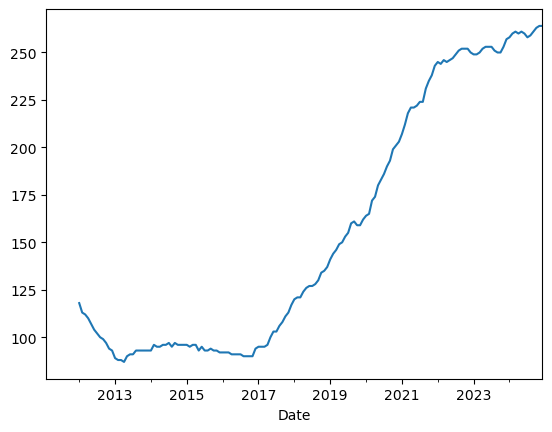

In [24]:
data.xs("YUM", level = 1)["dollar_vol_rank"].plot()

In [25]:
data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close       atr   bb_high    bb_low    bb_mid  \
Date       Ticker                                                       
2012-01-31 A        27.159130 -0.674458  3.396245  3.172395  3.284320   
           AAPL     13.752229 -0.885601  2.687980  2.576691  2.632335   
           ABT      20.183445 -1.122030  3.092366  3.057913  3.075140   
           ACN      45.250191 -0.862742  3.854901  3.716178  3.785539   
           ADBE     30.950001 -0.962407  3.493363  3.360498  3.426930   
...                       ...       ...       ...       ...       ...   
2024-12-31 WDAY    262.000000  1.588239  5.648614  5.545855  5.597234   
           WFC      70.410004  1.745432  4.332706  4.239613  4.286159   
           WMT      90.570000  3.579753  4.578519  4.517318  4.547918   
           XOM     105.760002  0.347505  4.782418  4.638960  4.710689   
           ZTS     162.240005  0.788867  5.220666  5.080445  5.150556   

                   garman_klass_vol      macd        rsi  
Date       Ticker                                         
2012-01-31 A              -0.006329  0.653720  64.022291  
           AAPL           -0.010863 -0.044888  74.551926  
           ABT            -0.026055 -0.203393  39.176760  
           ACN            -0.021435 -0.024242  63.512717  
           ADBE            0.000062 -0.016502  66.239107  
...                             ...       ...        ...  
2024-12-31 WDAY            0.000183  0.330885  46.475547  
           WFC             0.000107 -0.330244  46.426353  
           WMT             0.000053  1.417661  46.647306  
           XOM             0.000039 -3.182361  22.356207  
           ZTS             0.000088 -2.076899  29.113673  

[23244 rows x 8 columns]

In [26]:
# 4. Calculate Monthly Returns for different time horizons as features.
# To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.

In [27]:
def calculate_ret(df):
    
    outlier_cutoff= 0.005
    lags = [1,2,3,6,9,12]
    
    for lag in lags:
        df[f'{lag}m_ret'] = (((df["adj close"].pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff), upper =x.quantile(1-outlier_cutoff))))
                             .add( 1)).pow(1/lag)).sub(1)
                        
    return df


In [28]:
data = data.groupby(level=1, group_keys = False).apply(calculate_ret).dropna()
data

adj close       atr   bb_high    bb_low    bb_mid  \
Date       Ticker                                                       
2013-01-31 A        28.922718 -1.013571  3.418076  3.335622  3.376849   
           AAPL     13.844266 -0.704321  2.893241  2.655055  2.774148   
           ABT      27.059732 -0.958998  3.330940  3.293674  3.312307   
           ACN      58.012810 -0.929565  4.089013  4.025492  4.057252   
           ADBE     37.830002 -0.974650  3.679714  3.653485  3.666600   
...                       ...       ...       ...       ...       ...   
2024-12-31 WDAY    262.000000  1.588239  5.648614  5.545855  5.597234   
           WFC      70.410004  1.745432  4.332706  4.239613  4.286159   
           WMT      90.570000  3.579753  4.578519  4.517318  4.547918   
           XOM     105.760002  0.347505  4.782418  4.638960  4.710689   
           ZTS     162.240005  0.788867  5.220666  5.080445  5.150556   

                   garman_klass_vol      macd        rsi    1m_ret    2m_ret  \
Date       Ticker                                                              
2013-01-31 A              -0.003222  0.338588  64.788034  0.093796  0.081041   
           AAPL           -0.010417 -0.623978  35.245799 -0.144089 -0.117819   
           ABT            -0.015701  0.117520  69.554371  0.082535  0.044443   
           ACN            -0.018083  0.028031  62.598690  0.081052  0.028810   
           ADBE            0.000097 -0.080732  51.864179  0.003981  0.045484   
...                             ...       ...        ...       ...       ...   
2024-12-31 WDAY            0.000183  0.330885  46.475547  0.048042  0.058478   
           WFC             0.000107 -0.330244  46.426353 -0.075620  0.044421   
           WMT             0.000053  1.417661  46.647306 -0.018695  0.052442   
           XOM             0.000039 -3.182361  22.356207 -0.103425 -0.048352   
           ZTS             0.000088 -2.076899  29.113673 -0.074237 -0.081745   

                     3m_ret    6m_ret    9m_ret   12m_ret  
Date       Ticker                                          
2013-01-31 A       0.074450  0.027302  0.007530  0.005257  
           AAPL   -0.083985 -0.046308 -0.026277  0.000556  
           ABT     0.026788  0.012458  0.016617  0.024733  
           ACN     0.021679  0.031722  0.012645  0.020921  
           ADBE    0.035917  0.034411  0.013430  0.016868  
...                     ...       ...       ...       ...  
2024-12-31 WDAY    0.023436  0.026797 -0.004458 -0.004347  
           WFC     0.078250  0.031067  0.024025  0.032528  
           WMT     0.039763  0.050561  0.047478  0.047447  
           XOM    -0.033712 -0.012716 -0.008671  0.006820  
           ZTS    -0.036702 -0.004810  0.163678  0.124479  

[20589 rows x 14 columns]

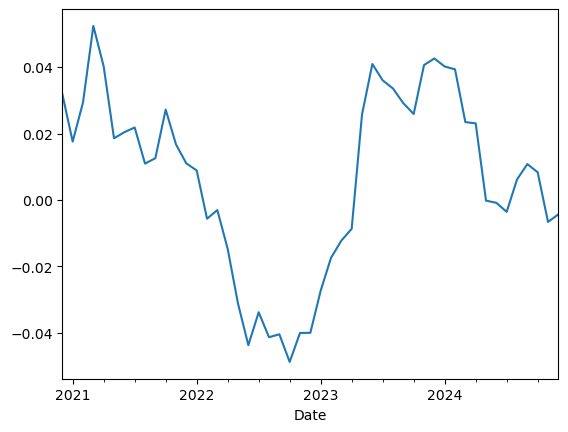

In [29]:
data.xs("WDAY", level=1)["12m_ret"].plot();

In [30]:
# 5. Download Fama-French Factors and Calculate Rolling Factor Betas.
# We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

# The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

# We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [31]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'Date'

factor_data = factor_data.join(data['1m_ret']).sort_index()

factor_data


Mkt-RF     SMB     HML     RMW     CMA    1m_ret
Date       Ticker                                                  
2013-01-31 A       0.0557  0.0048  0.0096 -0.0193  0.0141  0.093796
           AAPL    0.0557  0.0048  0.0096 -0.0193  0.0141 -0.144089
           ABT     0.0557  0.0048  0.0096 -0.0193  0.0141  0.082535
           ACN     0.0557  0.0048  0.0096 -0.0193  0.0141  0.081052
           ADBE    0.0557  0.0048  0.0096 -0.0193  0.0141  0.003981
...                   ...     ...     ...     ...     ...       ...
2024-11-30 WDAY    0.0650  0.0478 -0.0005 -0.0261 -0.0217  0.069019
           WFC     0.0650  0.0478 -0.0005 -0.0261 -0.0217  0.180051
           WMT     0.0650  0.0478 -0.0005 -0.0261 -0.0217  0.128737
           XOM     0.0650  0.0478 -0.0005 -0.0261 -0.0217  0.010104
           ZTS     0.0650  0.0478 -0.0005 -0.0261 -0.0217 -0.098371

[20446 rows x 6 columns]

In [33]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('Ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA    1m_ret
Date       Ticker                                                  
2013-01-31 A       0.0557  0.0048  0.0096 -0.0193  0.0141  0.093796
           AAPL    0.0557  0.0048  0.0096 -0.0193  0.0141 -0.144089
           ABT     0.0557  0.0048  0.0096 -0.0193  0.0141  0.082535
           ACN     0.0557  0.0048  0.0096 -0.0193  0.0141  0.081052
           ADBE    0.0557  0.0048  0.0096 -0.0193  0.0141  0.003981
...                   ...     ...     ...     ...     ...       ...
2024-11-30 VZ      0.0650  0.0478 -0.0005 -0.0261 -0.0217  0.052457
           WDAY    0.0650  0.0478 -0.0005 -0.0261 -0.0217  0.069019
           WFC     0.0650  0.0478 -0.0005 -0.0261 -0.0217  0.180051
           WMT     0.0650  0.0478 -0.0005 -0.0261 -0.0217  0.128737
           XOM     0.0650  0.0478 -0.0005 -0.0261 -0.0217  0.010104

[20384 rows x 6 columns]

In [34]:
# Calculate Rolling Factor Betas.

In [37]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['1m_ret'], 
                                     exog=sm.add_constant(x.drop('1m_ret', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

Mkt-RF       SMB       HML       RMW       CMA
Date       Ticker                                                  
2013-01-31 A            NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-11-30 VZ      0.883027 -0.572441  0.282183  0.527759  0.289520
           WDAY    0.760453 -1.023488  0.151870 -2.489189 -0.729128
           WFC     0.723452 -0.312081  1.429828 -2.012389 -1.095389
           WMT     0.844641  0.176016 -0.332831  1.279445  0.295516
           XOM     0.610114  0.021109  0.209403  1.190127  0.729821

[20384 rows x 5 columns]

In [38]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('Ticker').shift()))

data.loc[:, factors] = data.groupby('Ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20344 entries, (Timestamp('2013-01-31 00:00:00', freq='M'), 'AAPL') to (Timestamp('2024-12-31 00:00:00', freq='M'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               20344 non-null  float64
 1   bb_high           20344 non-null  float64
 2   bb_low            20344 non-null  float64
 3   bb_mid            20344 non-null  float64
 4   garman_klass_vol  20344 non-null  float64
 5   macd              20344 non-null  float64
 6   rsi               20344 non-null  float64
 7   1m_ret            20344 non-null  float64
 8   2m_ret            20344 non-null  float64
 9   3m_ret            20344 non-null  float64
 10  6m_ret            20344 non-null  float64
 11  9m_ret            20344 non-null  float64
 12  12m_ret           20344 non-null  float64
 13  Mkt-RF            20344 non-null  float64
 14  SMB               20344 non-null  flo

In [38]:
# 6. For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.
# K-Means Clustering
# You may want to initialize predefined centroids for each cluster based on your research.

# For visualization purpose of this tutorial we will initially rely on the ‘k-means++’ initialization.

# Then we will pre-define our centroids for each cluster.

In [44]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [48]:
from sklearn.cluster import KMeans

data = data.drop('cluster', axis=1)
                 
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('Date', group_keys=False).apply(get_clusters)

data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date       Ticker                                                             
2013-01-31 AAPL   -0.704321  2.893241  2.655055  2.774148         -0.010417   
           ABT    -0.958998  3.330940  3.293674  3.312307         -0.015701   
           ACN    -0.929565  4.089013  4.025492  4.057252         -0.018083   
           ADBE   -0.974650  3.679714  3.653485  3.666600          0.000097   
           AIG    -1.117732  3.414553  3.317652  3.366103         -0.023758   
...                     ...       ...       ...       ...               ...   
2024-12-31 VZ     -0.597789  3.809721  3.681540  3.745631          0.000052   
           WDAY    1.588239  5.648614  5.545855  5.597234          0.000183   
           WFC     1.745432  4.332706  4.239613  4.286159          0.000107   
           WMT     3.579753  4.578519  4.517318  4.547918          0.000053   
           XOM     0.347505  4.782418  4.638960  4.710689          0.000039   

                       macd        rsi    1m_ret    2m_ret    3m_ret  \
Date       Ticker                                                      
2013-01-31 AAPL   -0.623978  35.245799 -0.144089 -0.117819 -0.083985   
           ABT     0.117520  69.554371  0.082535  0.044443  0.026788   
           ACN     0.028031  62.598690  0.081052  0.028810  0.021679   
           ADBE   -0.080732  51.864179  0.003981  0.045484  0.035917   
           AIG     0.581590  68.260726  0.071672  0.068581  0.026942   
...                     ...        ...       ...       ...       ...   
2024-12-31 VZ     -1.998606  28.225966 -0.106901 -0.030491 -0.036112   
           WDAY    0.330885  46.475547  0.048042  0.058478  0.023436   
           WFC    -0.330244  46.426353 -0.075620  0.044421  0.078250   
           WMT     1.417661  46.647306 -0.018695  0.052442  0.039763   
           XOM    -3.182361  22.356207 -0.103425 -0.048352 -0.033712   

                     6m_ret    9m_ret   12m_ret    Mkt-RF       SMB       HML  \
Date       Ticker                                                               
2013-01-31 AAPL   -0.046308 -0.026277  0.000556  1.170015 -0.069214 -0.388290   
           ABT     0.012458  0.016617  0.024733  1.049646 -0.093256 -0.623011   
           ACN     0.031722  0.012645  0.020921  1.127107 -0.251721 -0.175807   
           ADBE    0.034411  0.013430  0.016868  1.082831 -0.354146 -0.078966   
           AIG     0.032250  0.011832  0.034743  1.166733 -0.394135  0.845644   
...                     ...       ...       ...       ...       ...       ...   
2024-12-31 VZ     -0.001475 -0.001122  0.009518  0.647704 -0.521381 -0.086535   
           WDAY    0.026797 -0.004458 -0.004347  1.152056 -0.800532 -0.535522   
           WFC     0.031067  0.024025  0.032528  1.082951 -0.120257  1.138532   
           WMT     0.050561  0.047478  0.047447  0.561956 -0.293434 -0.471458   
           XOM    -0.012716 -0.008671  0.006820  0.995348  0.172089  0.393717   

                        RMW       CMA  cluster  
Date       Ticker                               
2013-01-31 AAPL    0.901419 -0.763988        0  
           ABT     0.097900  0.651782        2  
           ACN     0.037734 -0.045343        2  
           ADBE   -0.388234 -1.147219        1  
           AIG    -0.797531 -0.817109        2  
...                     ...       ...      ...  
2024-12-31 VZ      0.356799  0.927234        0  
           WDAY   -1.222461 -0.016412        2  
           WFC    -0.583803 -0.381033        2  
           WMT     0.563648  0.809878        2  
           XOM    -0.144389  0.911389        0  

[20344 rows x 19 columns]

In [49]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,0] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,0] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,0] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,0] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

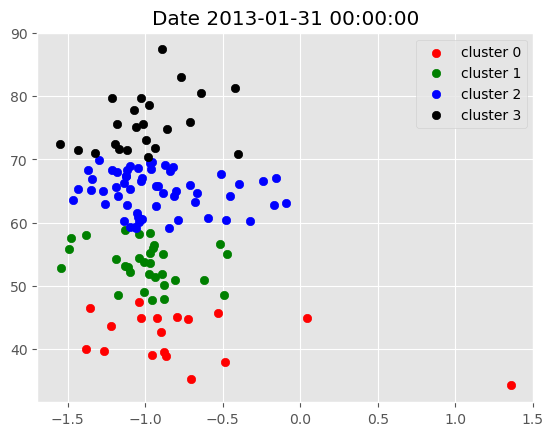

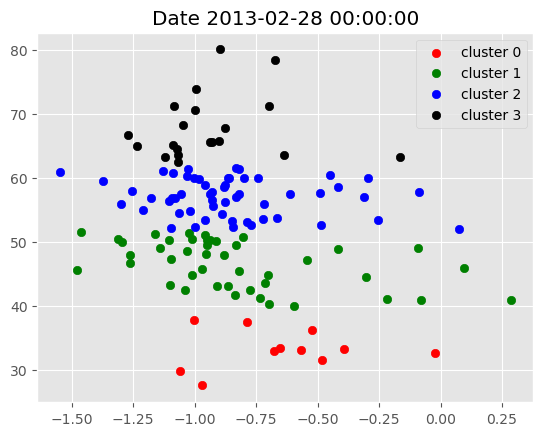

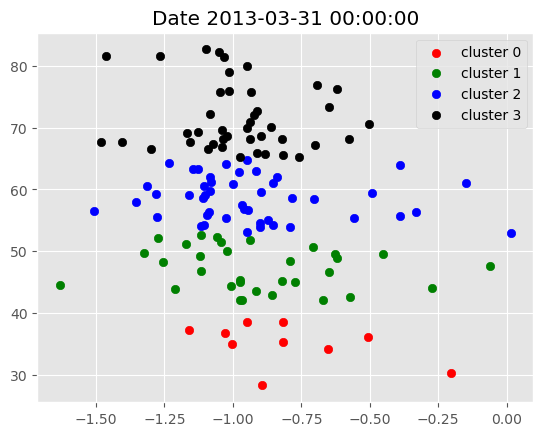

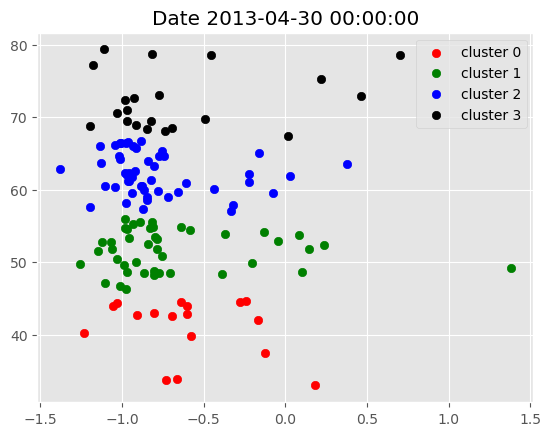

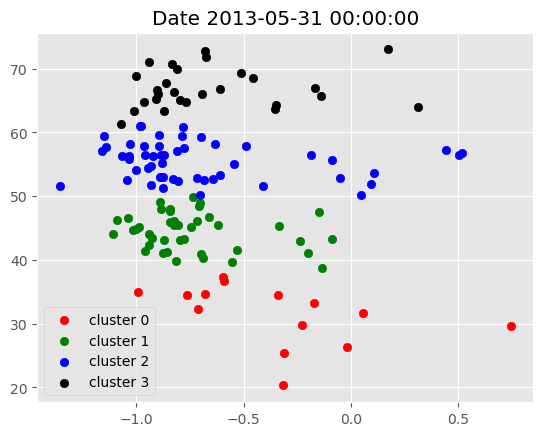

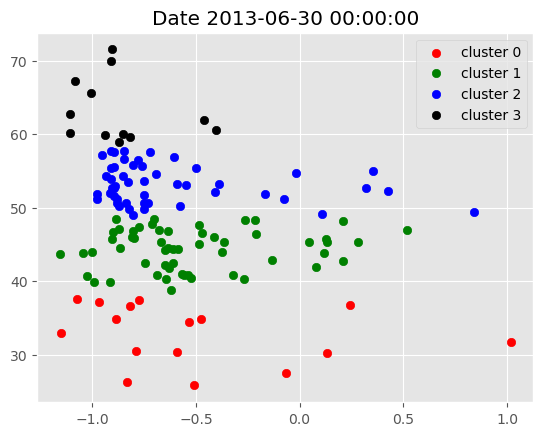

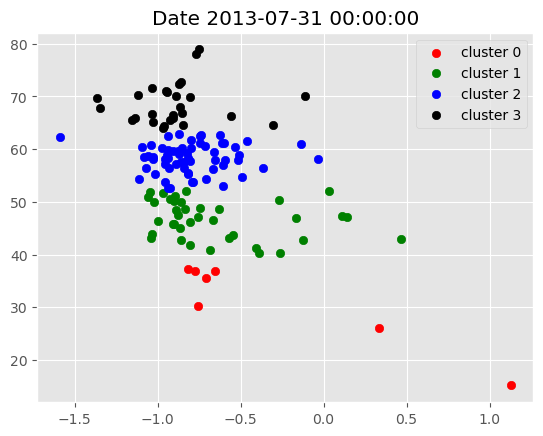

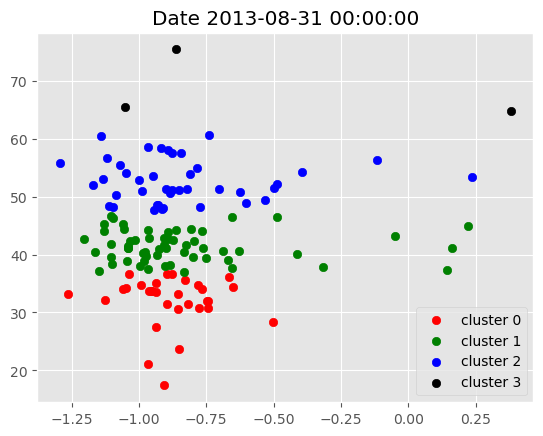

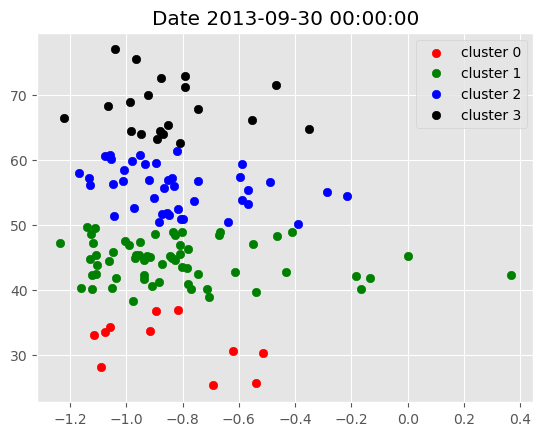

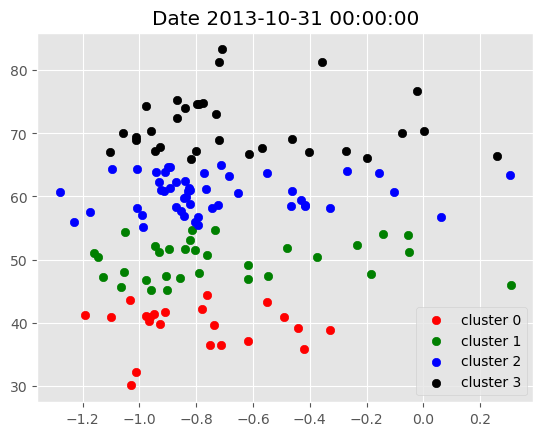

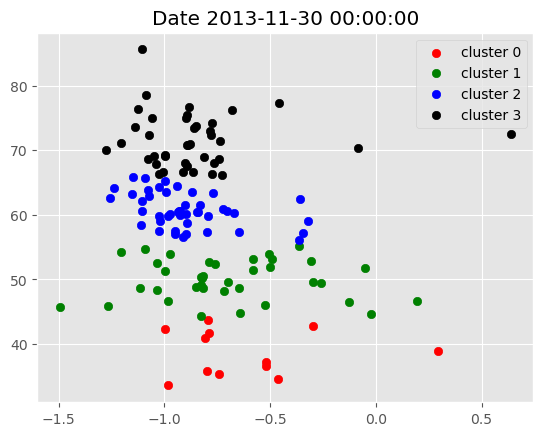

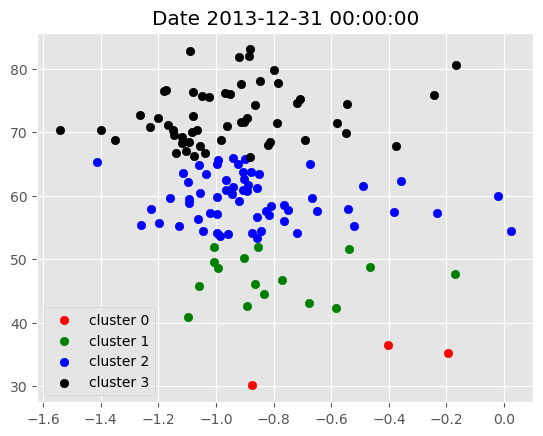

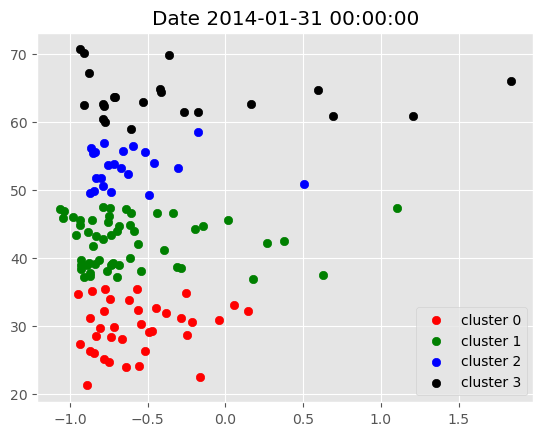

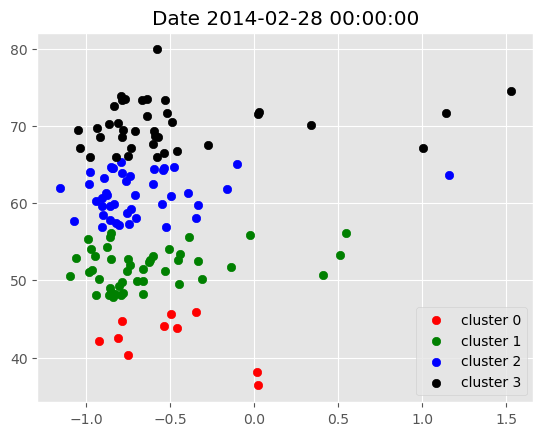

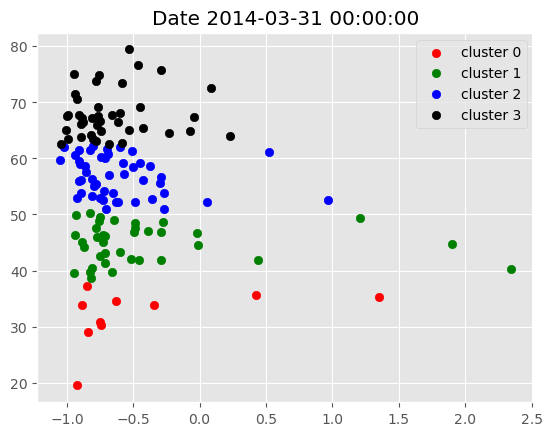

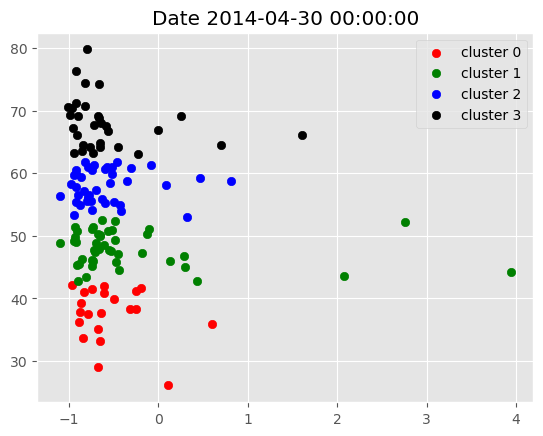

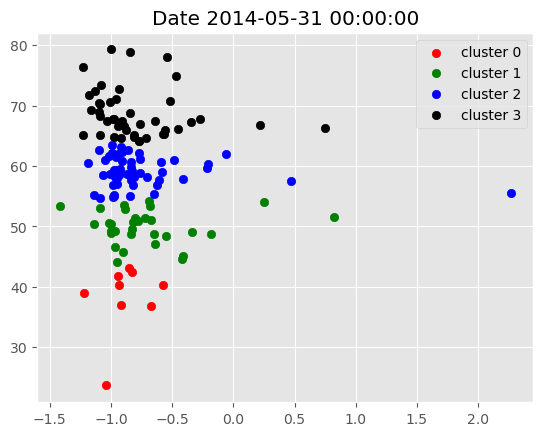

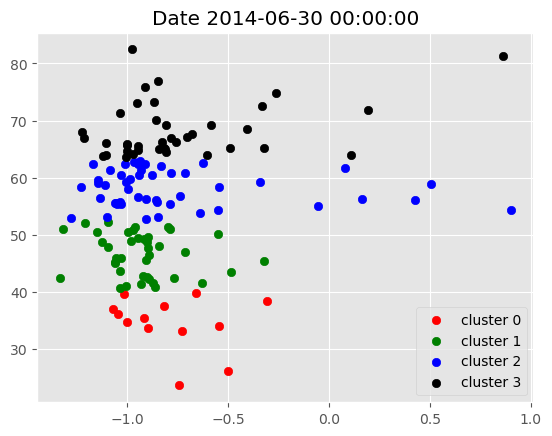

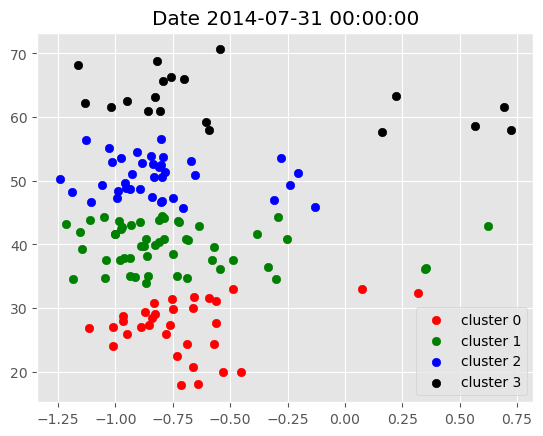

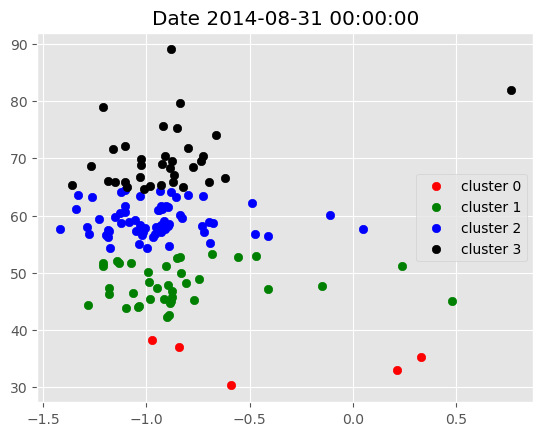

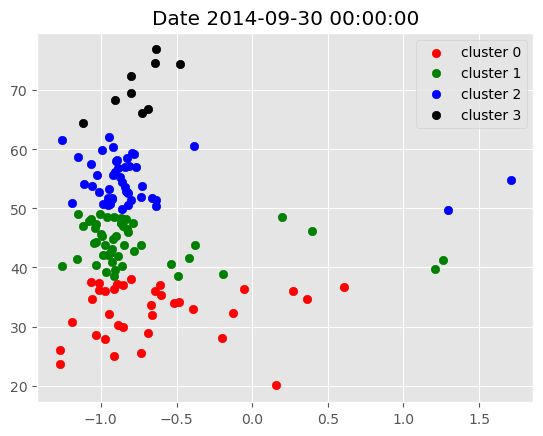

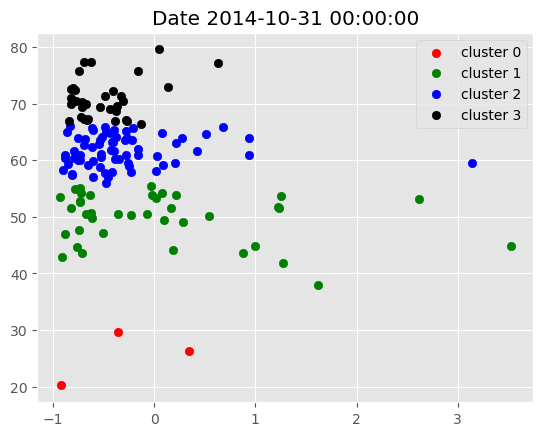

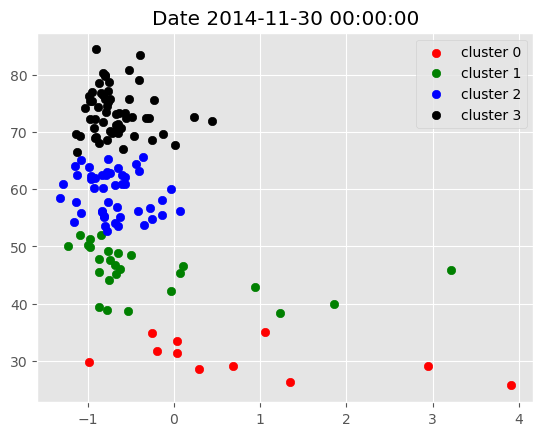

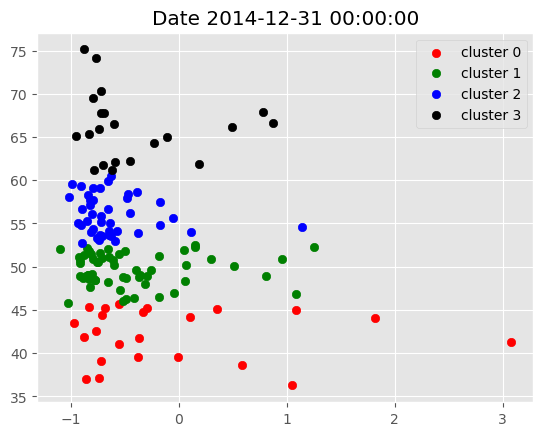

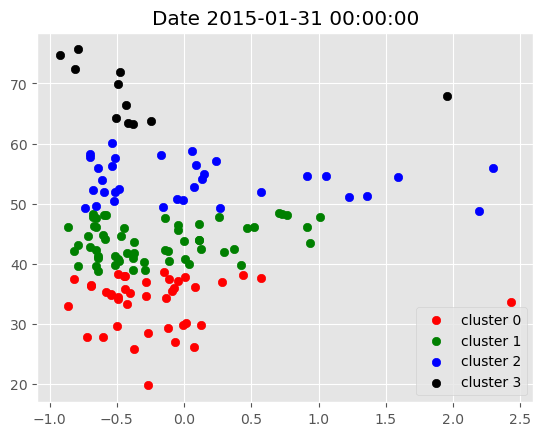

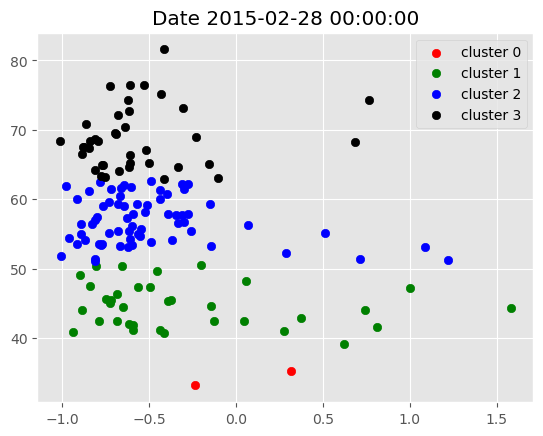

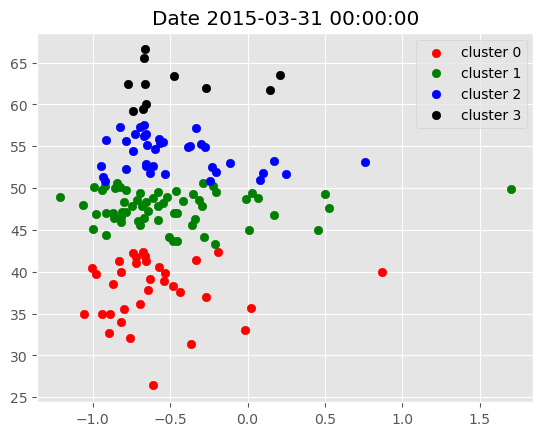

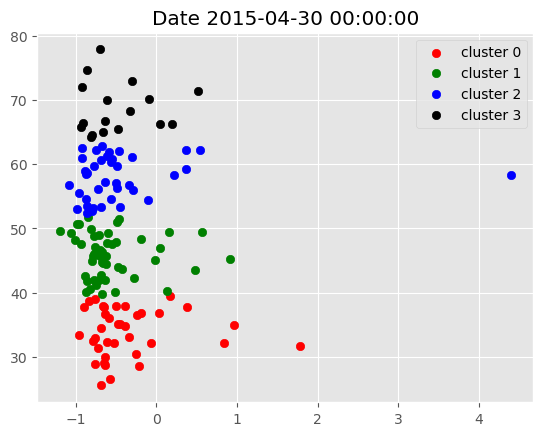

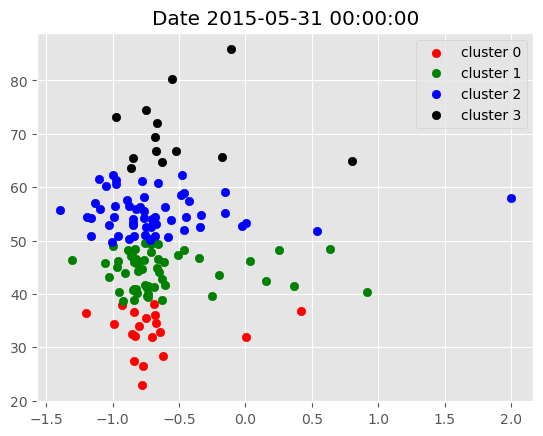

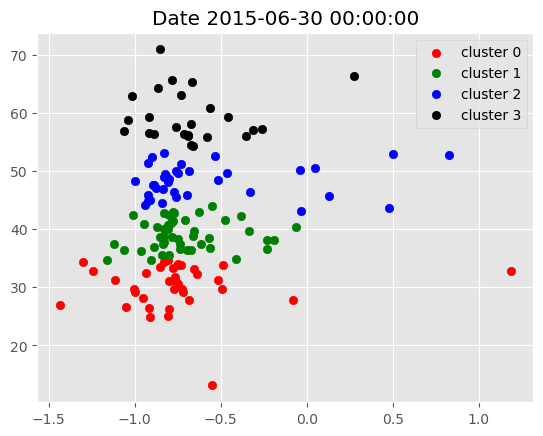

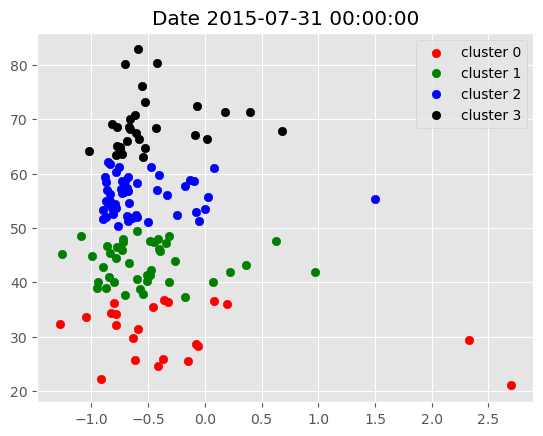

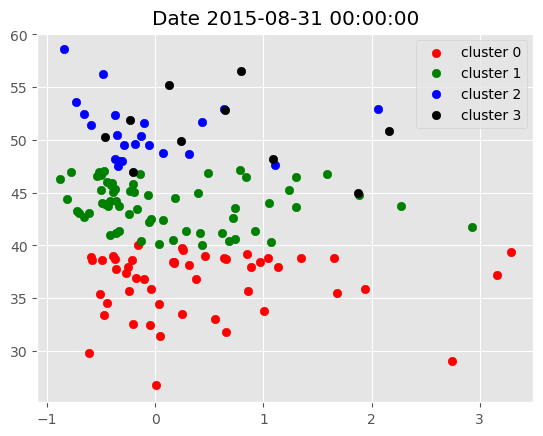

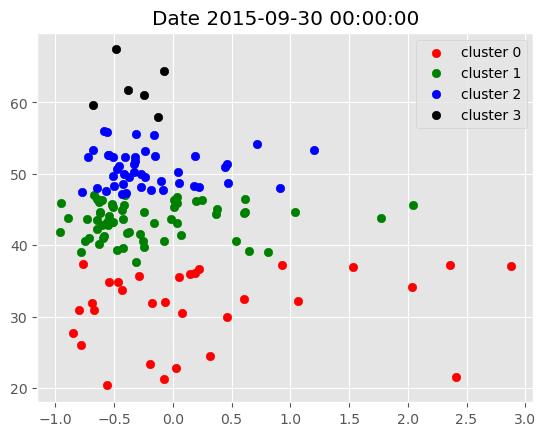

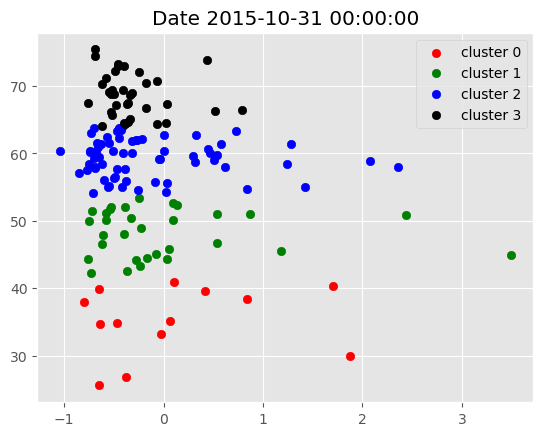

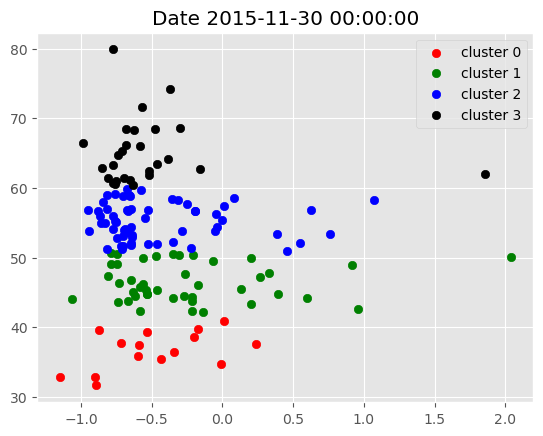

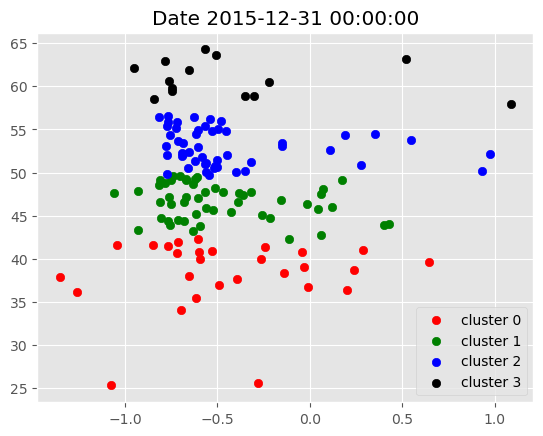

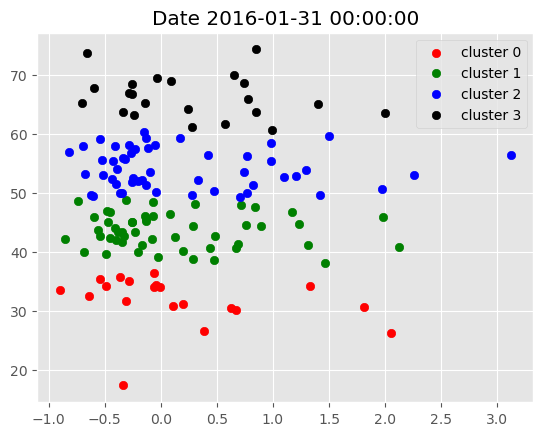

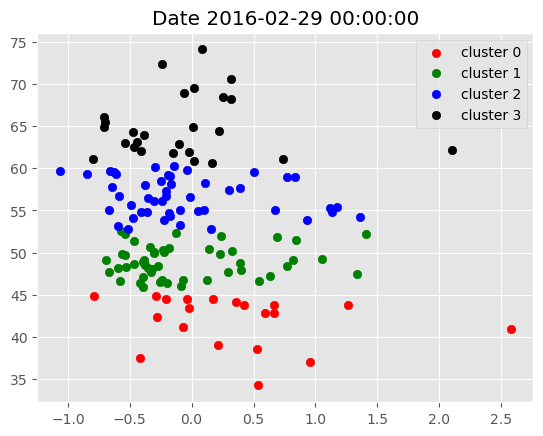

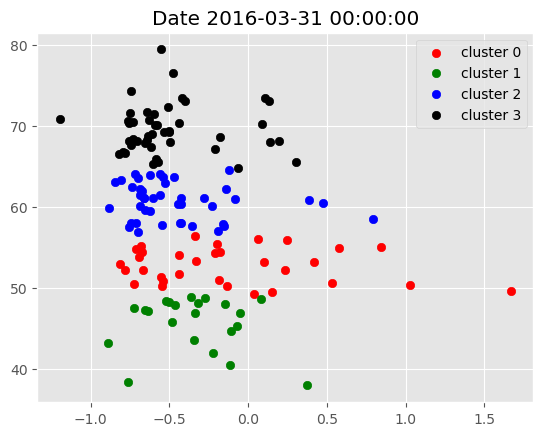

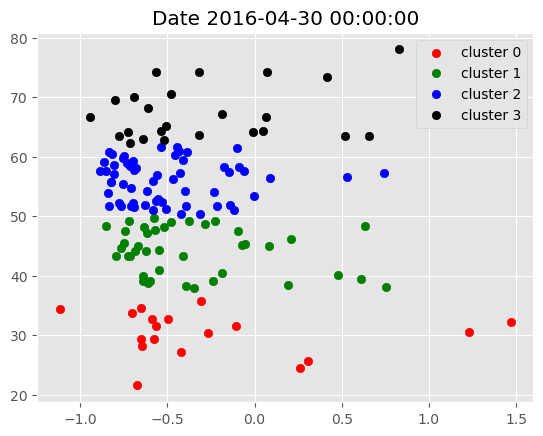

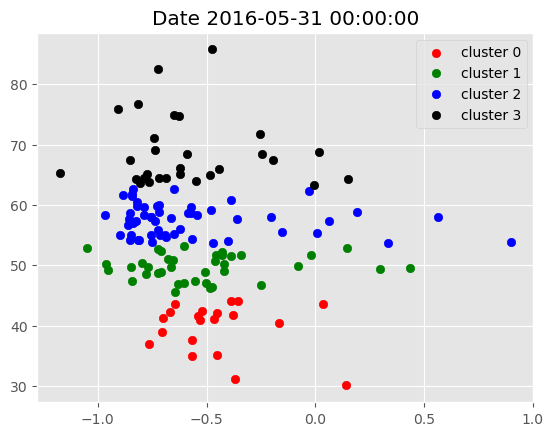

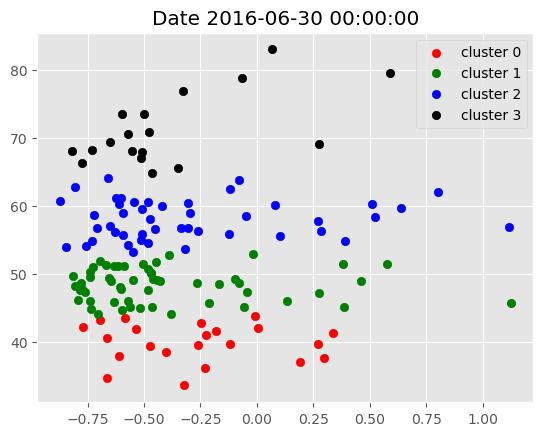

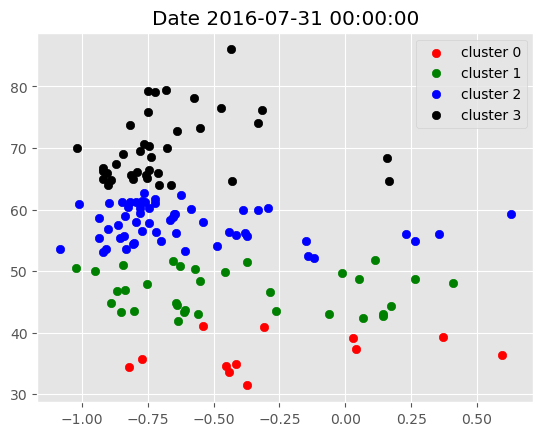

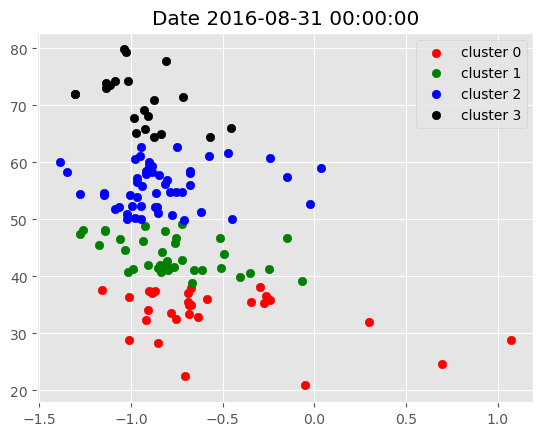

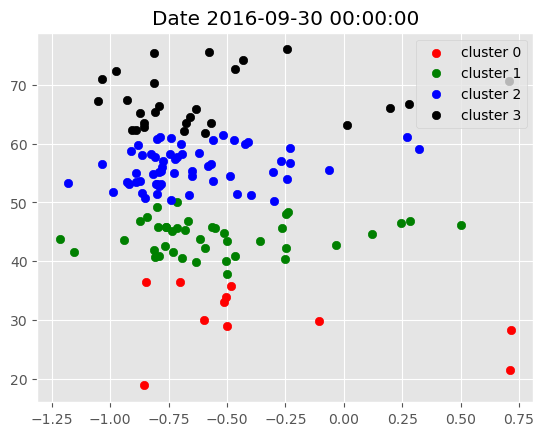

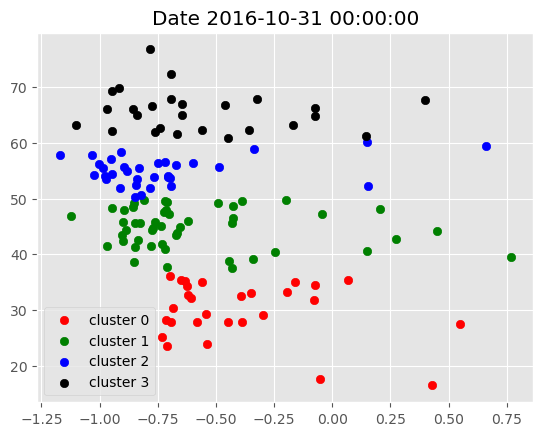

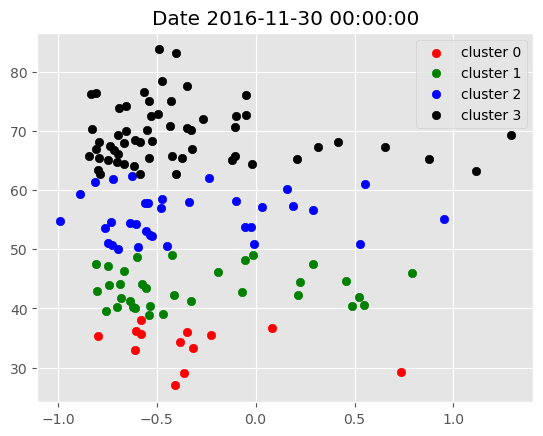

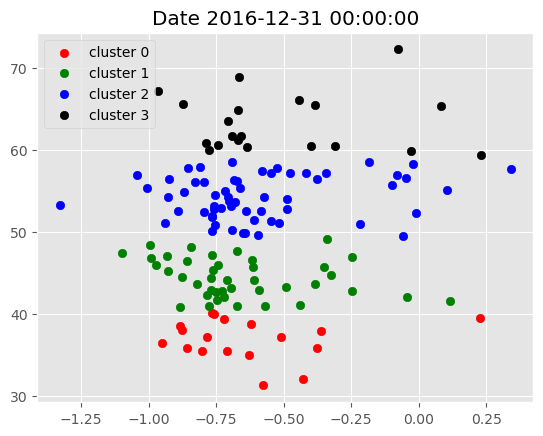

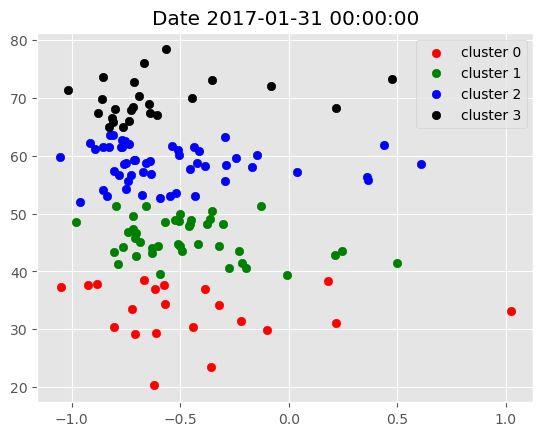

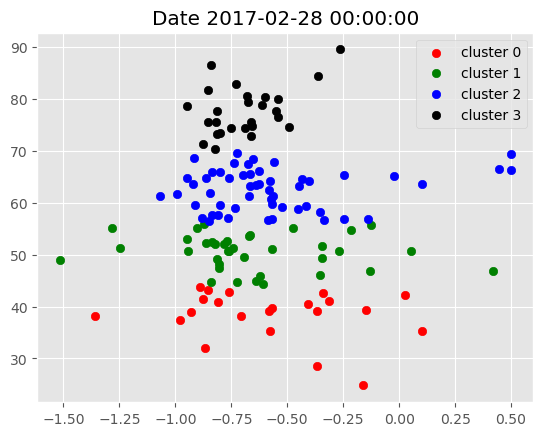

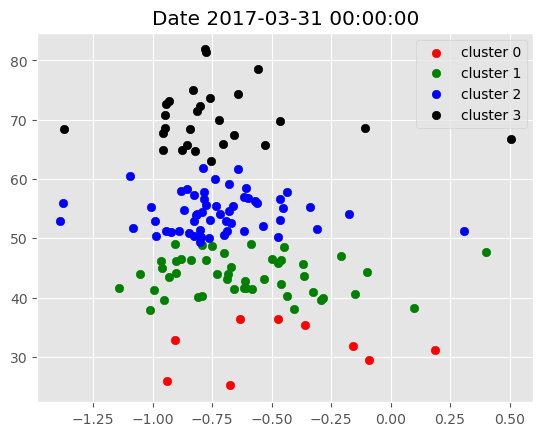

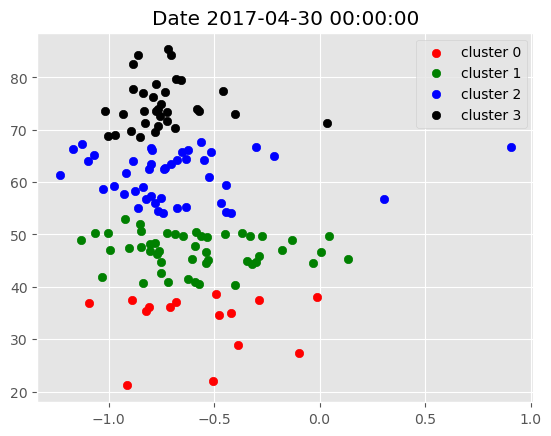

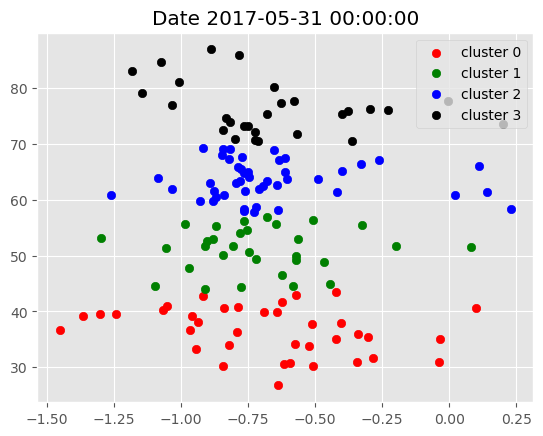

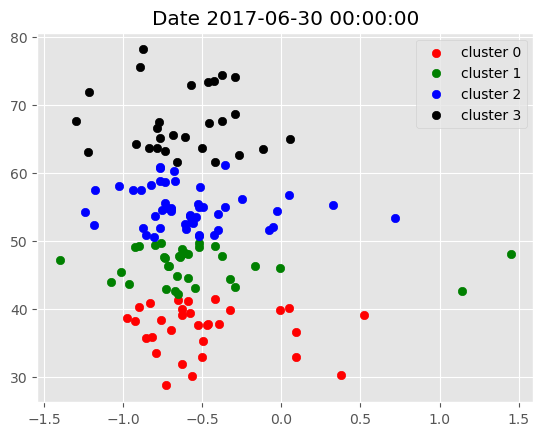

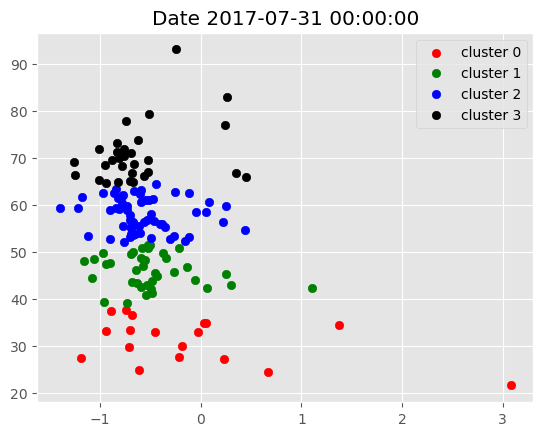

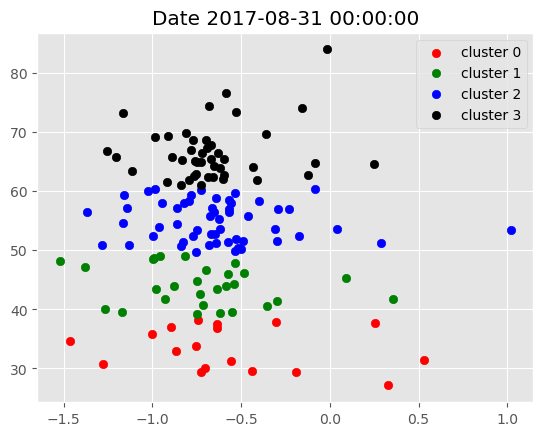

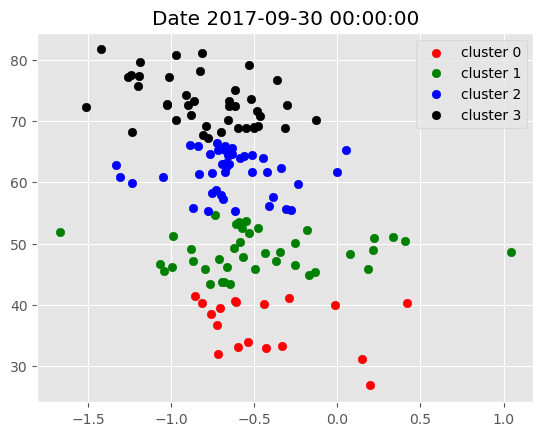

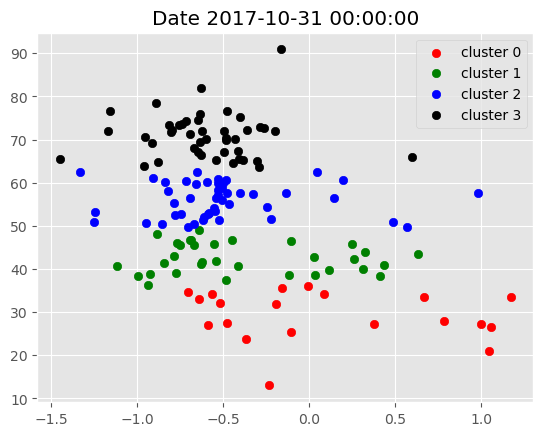

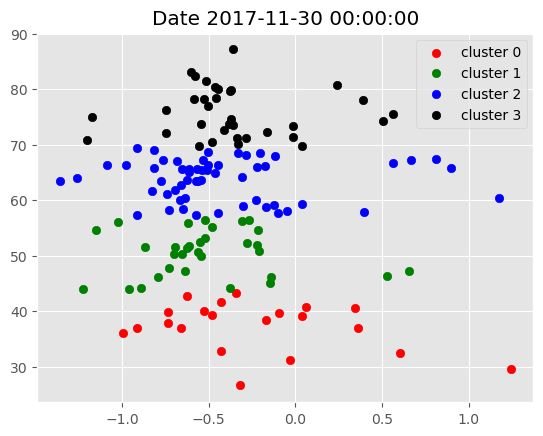

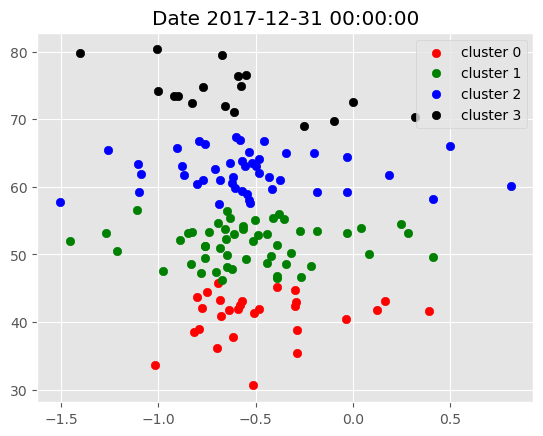

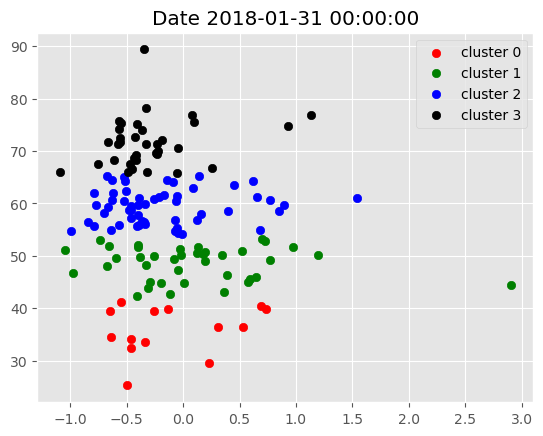

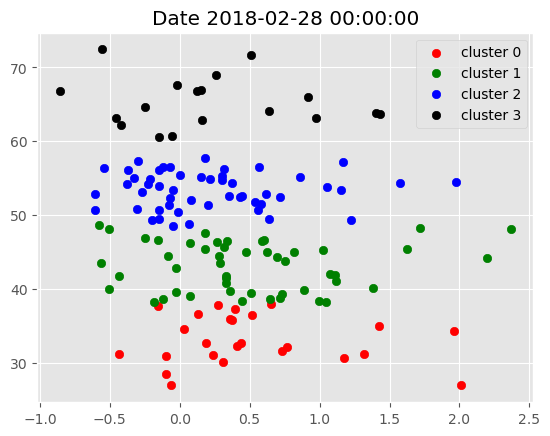

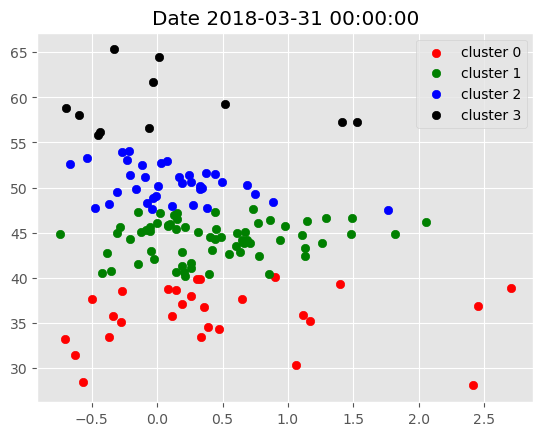

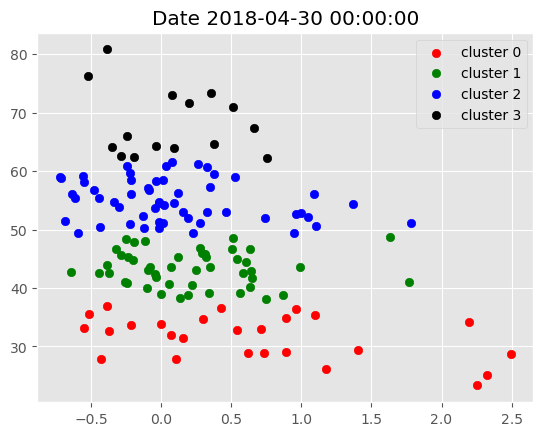

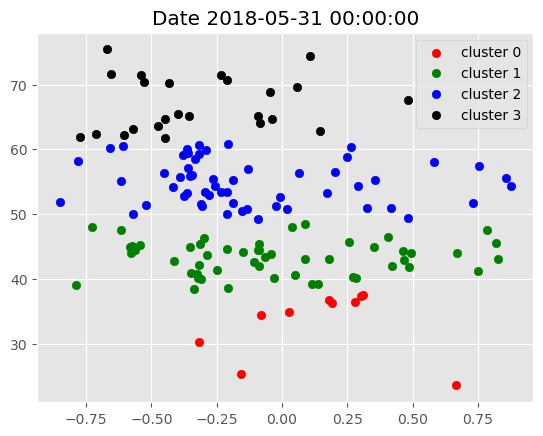

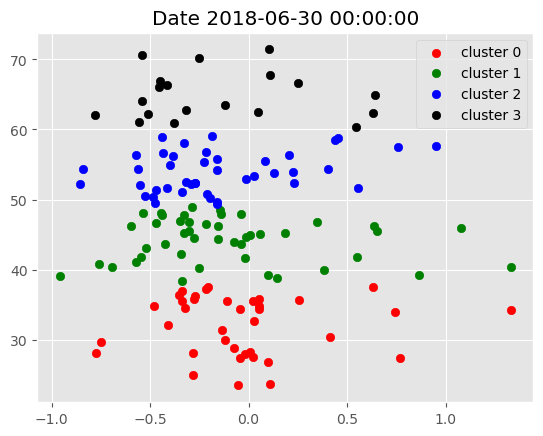

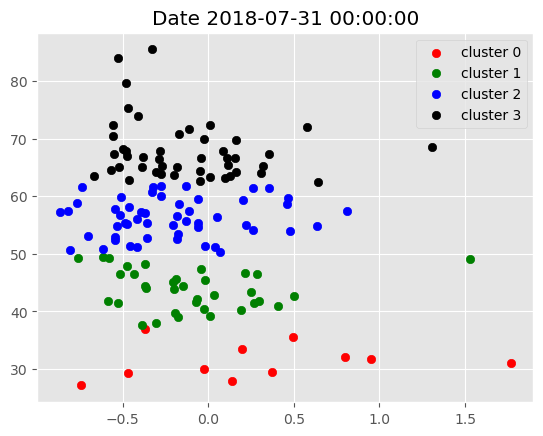

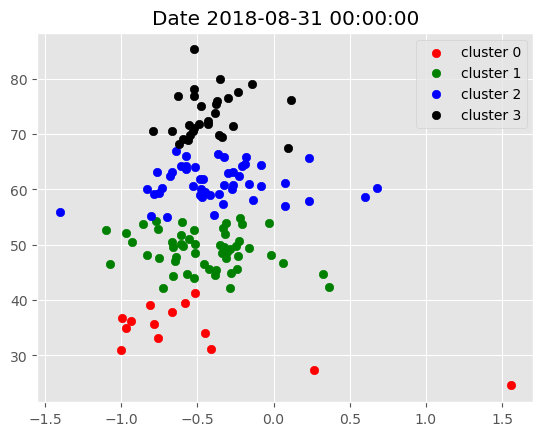

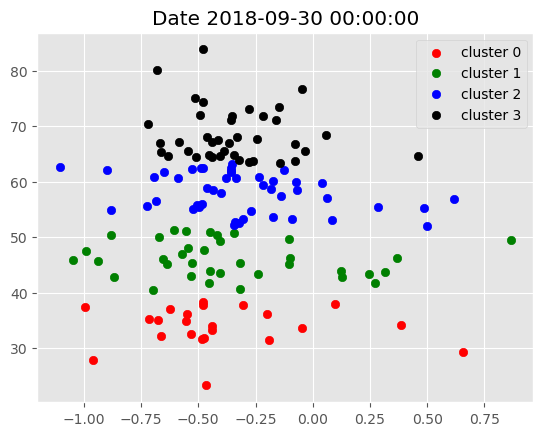

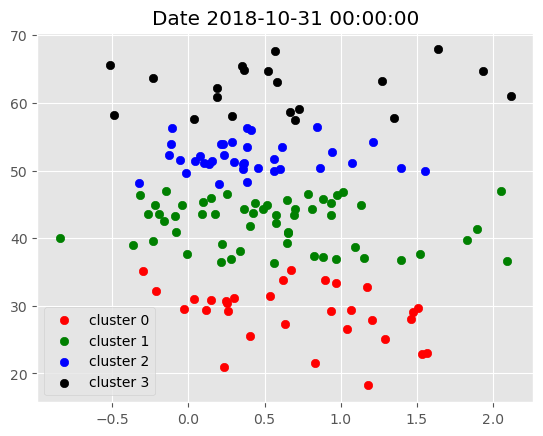

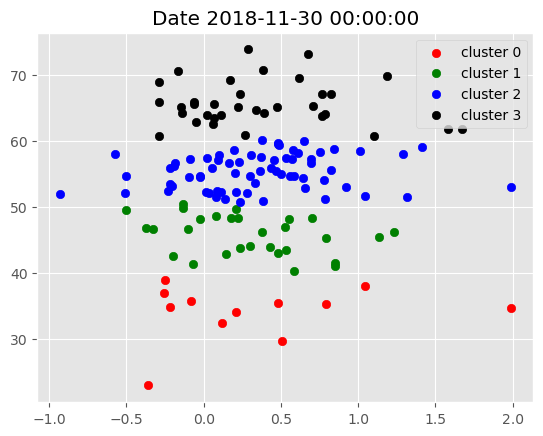

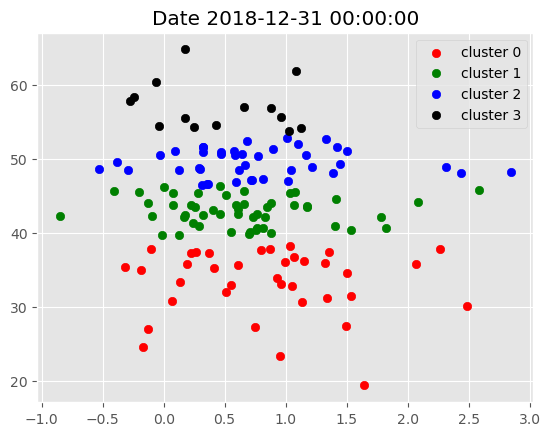

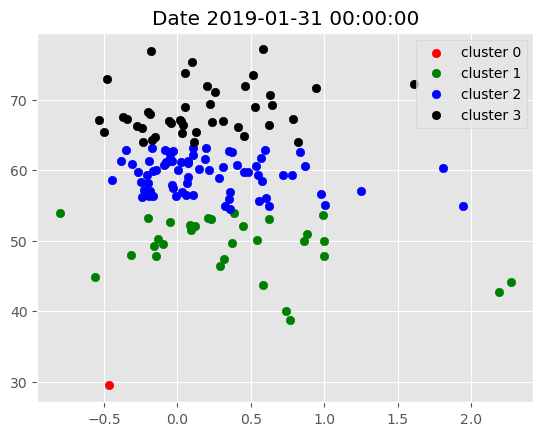

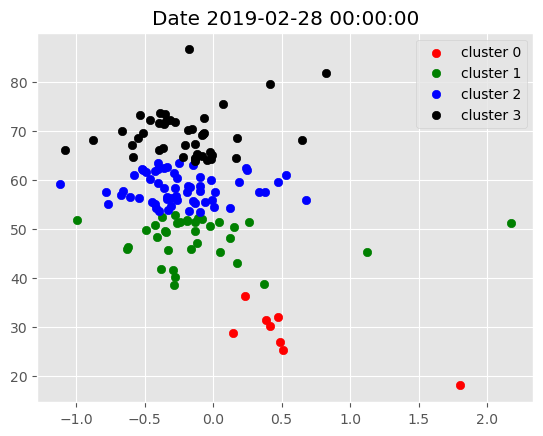

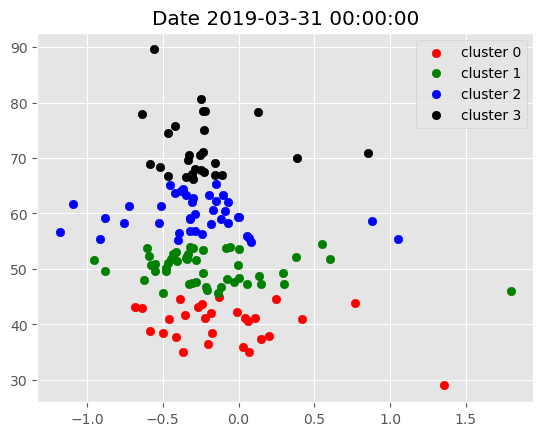

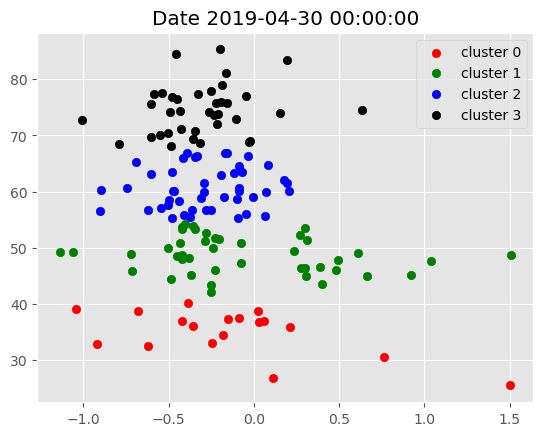

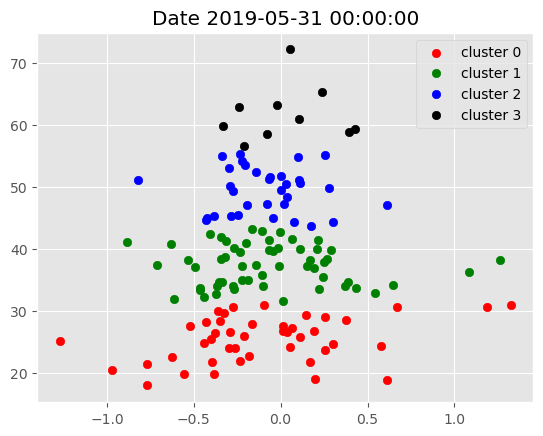

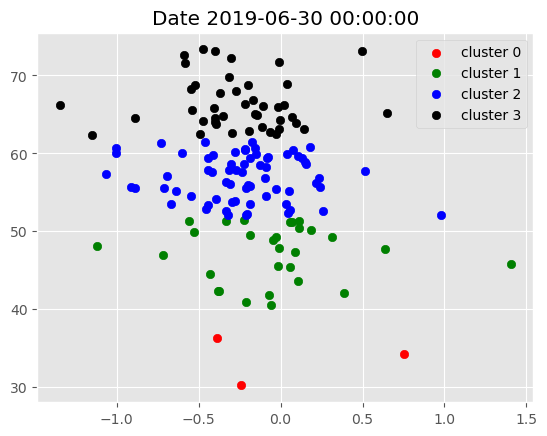

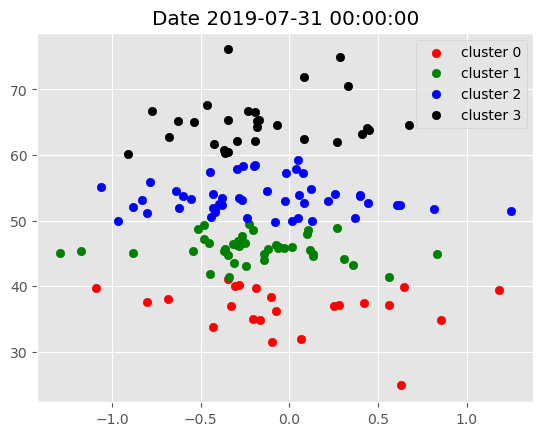

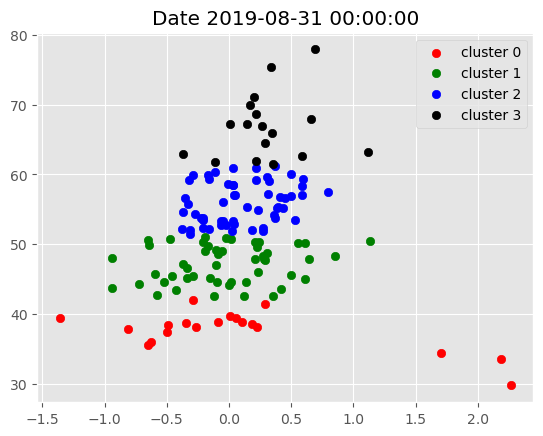

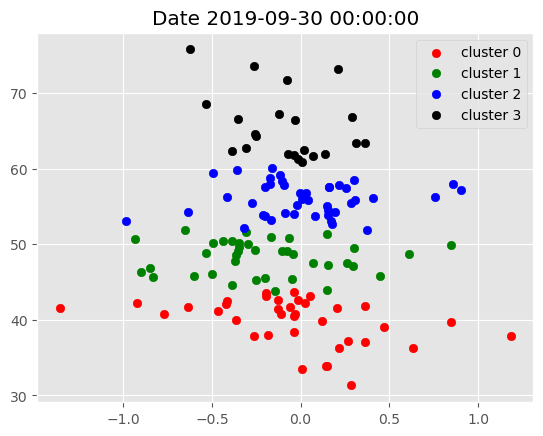

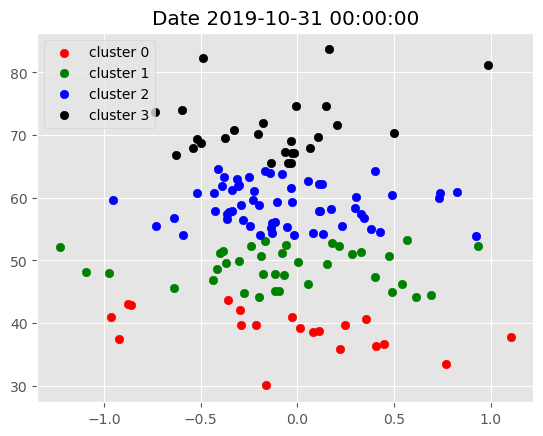

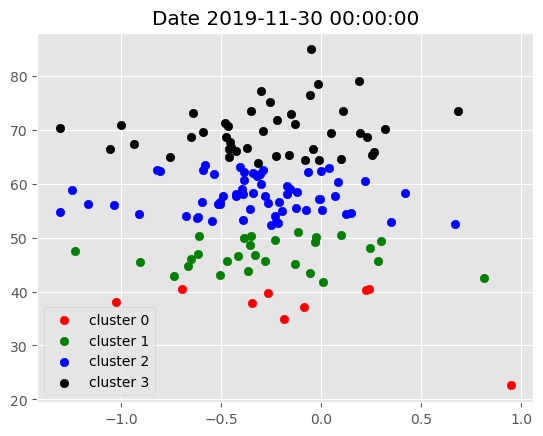

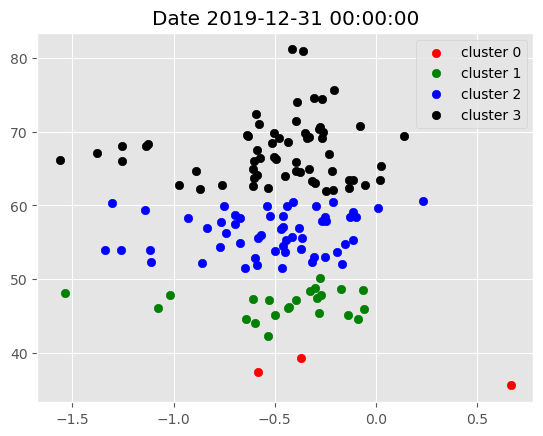

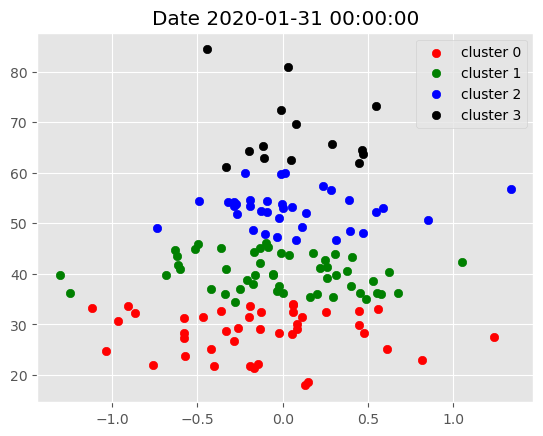

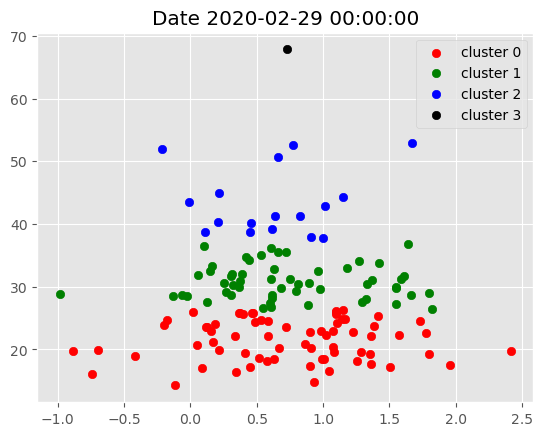

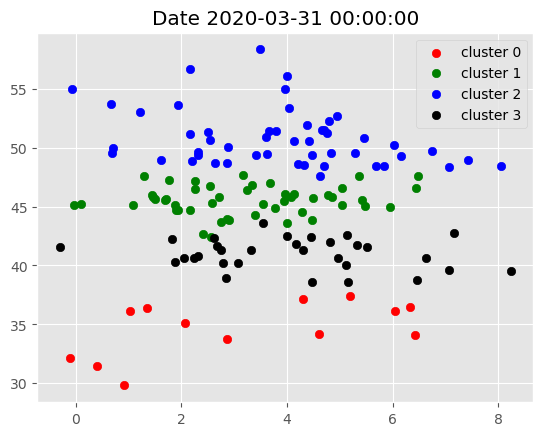

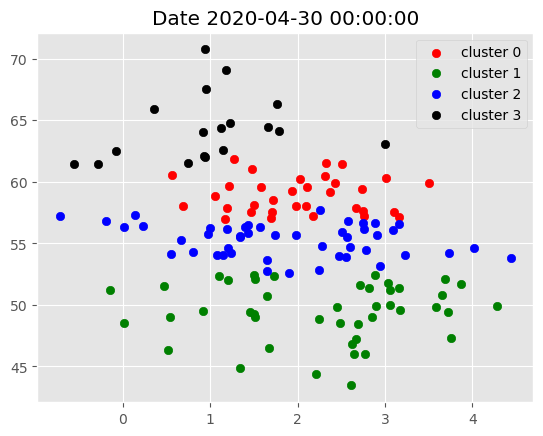

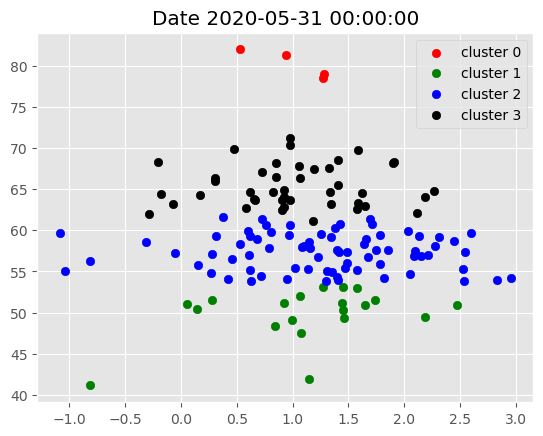

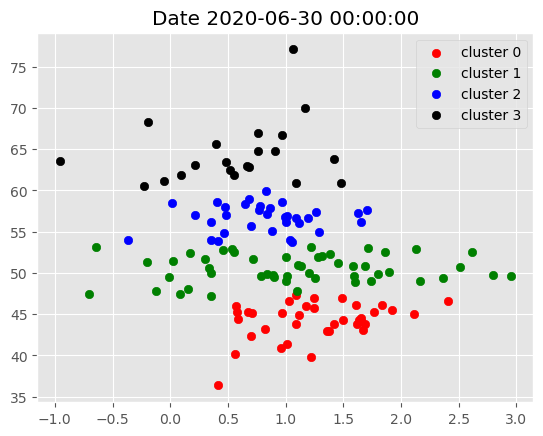

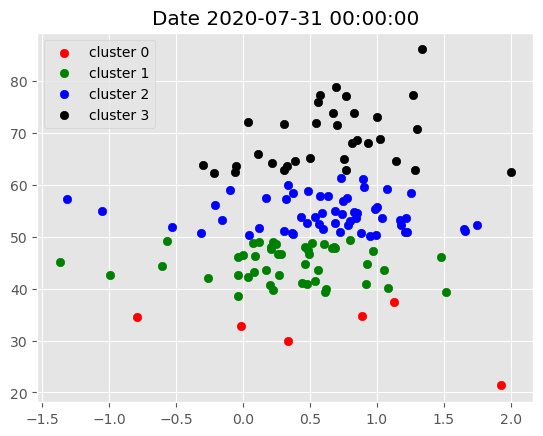

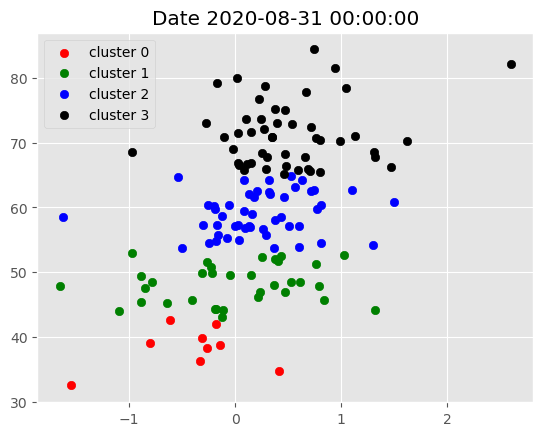

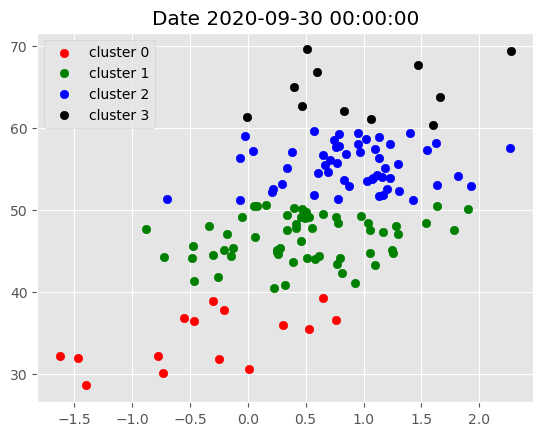

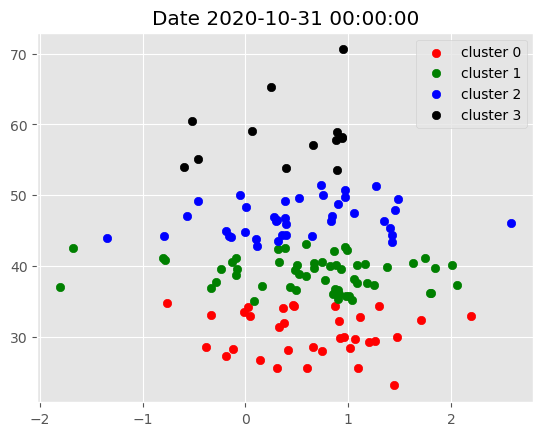

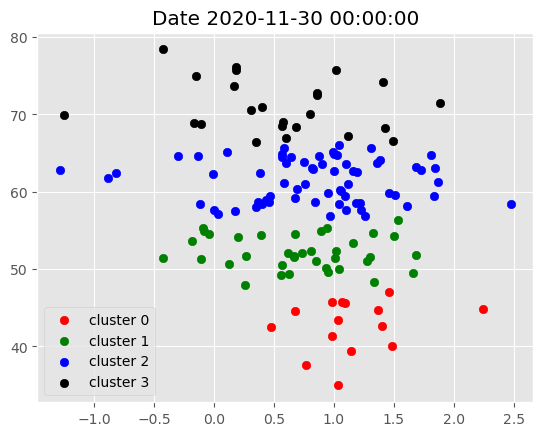

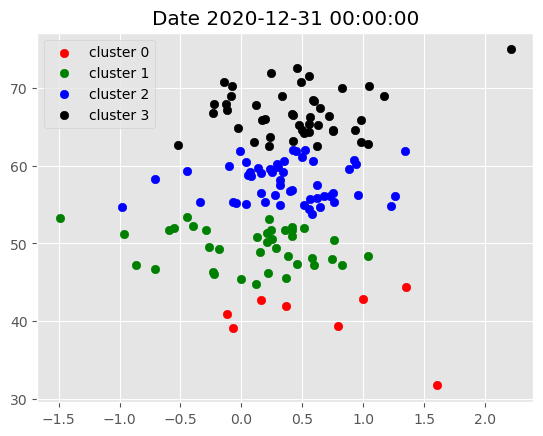

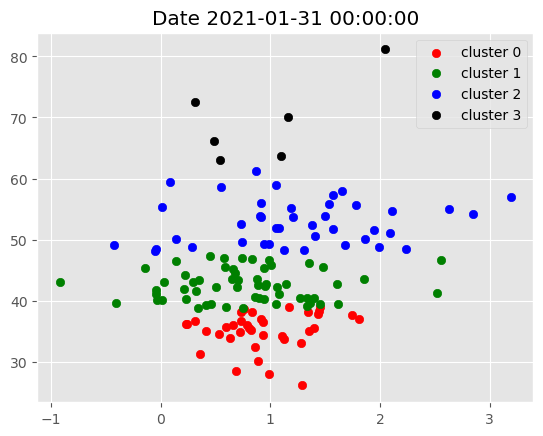

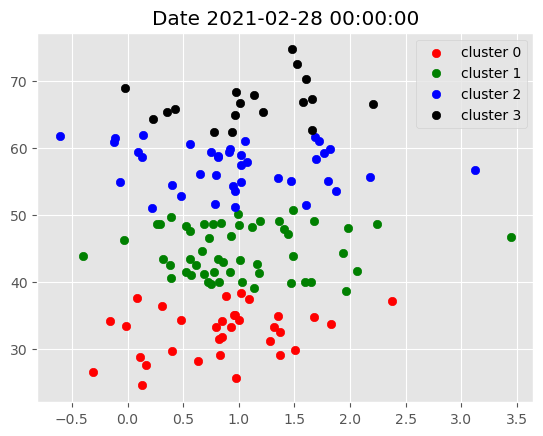

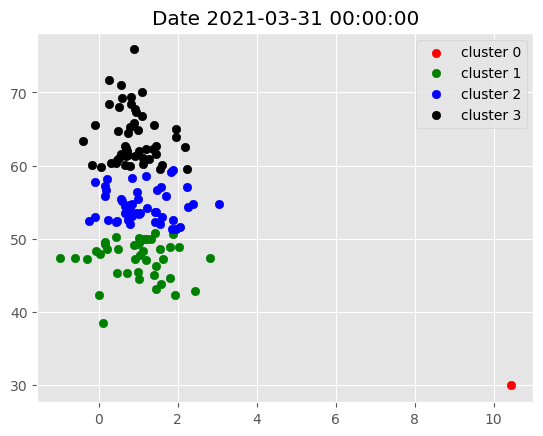

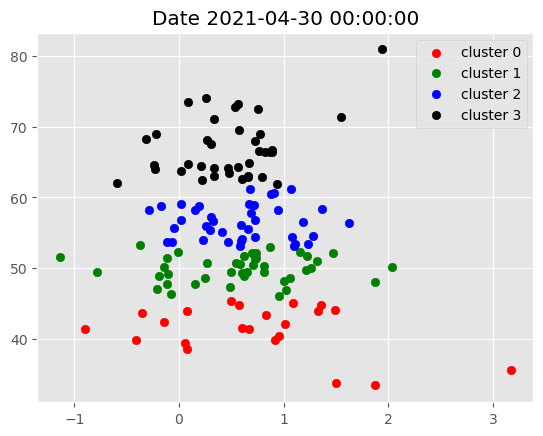

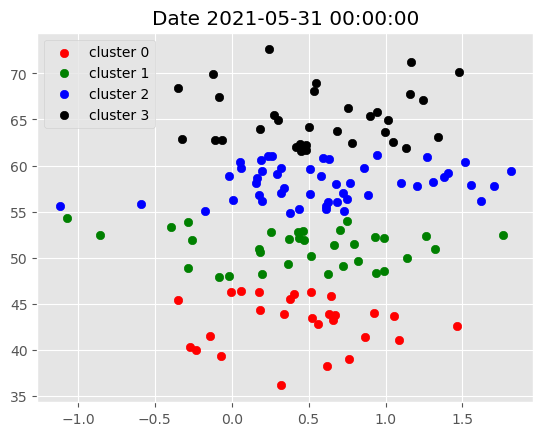

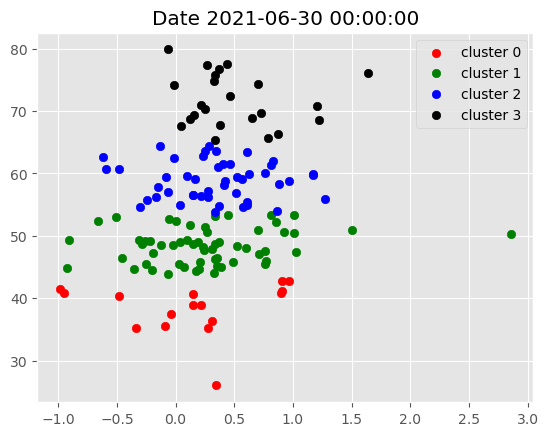

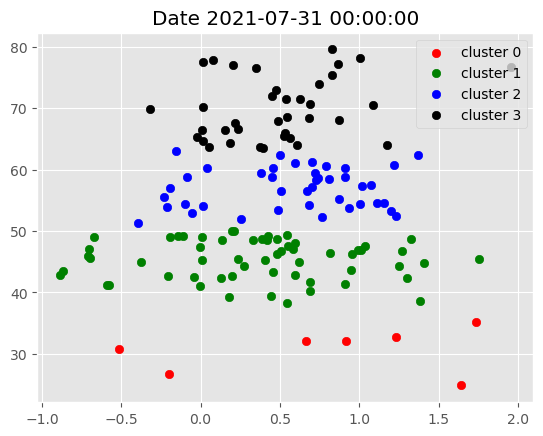

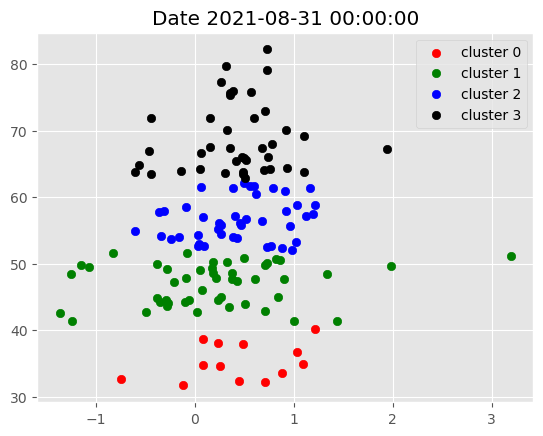

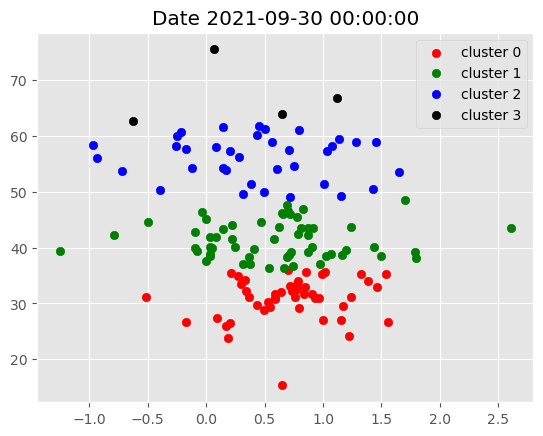

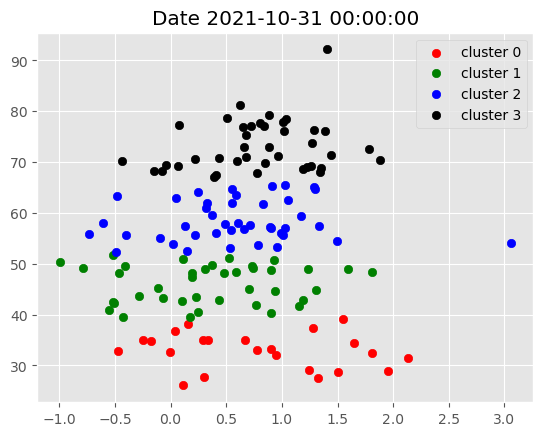

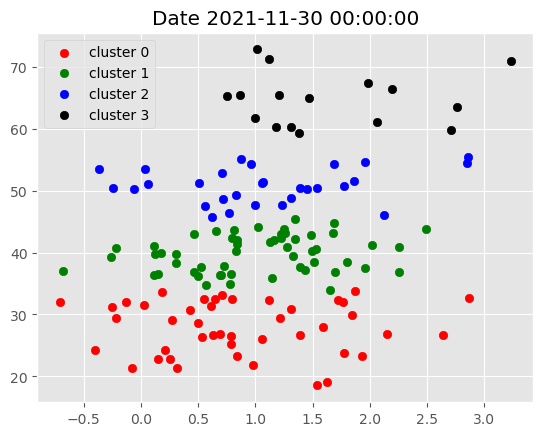

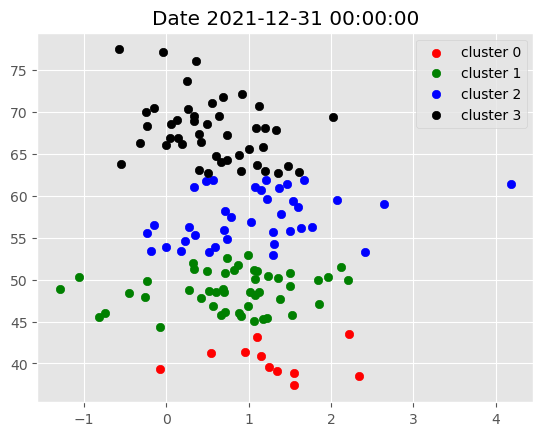

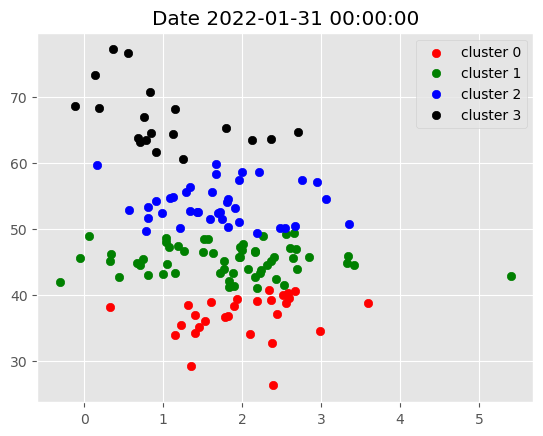

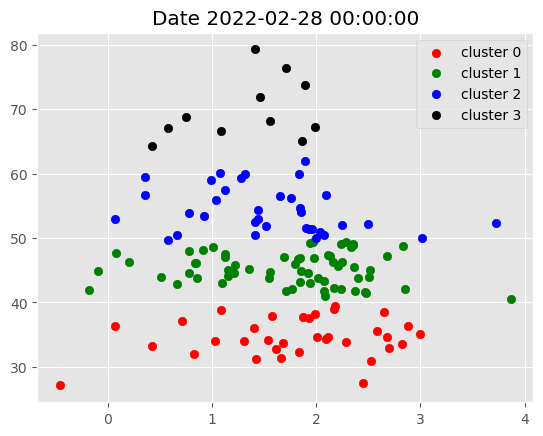

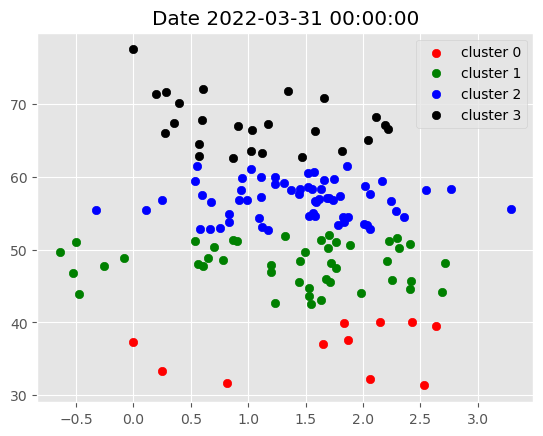

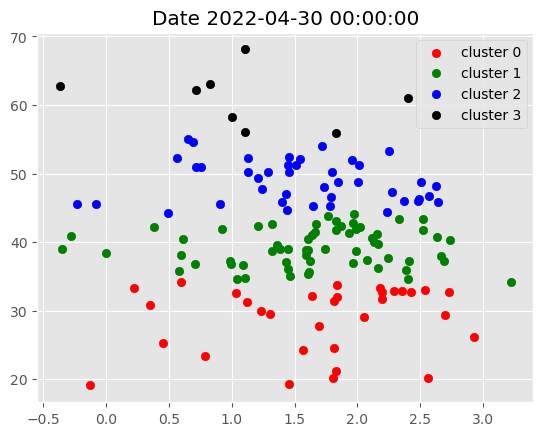

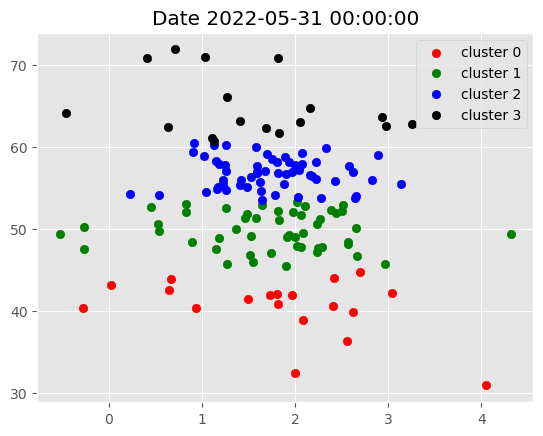

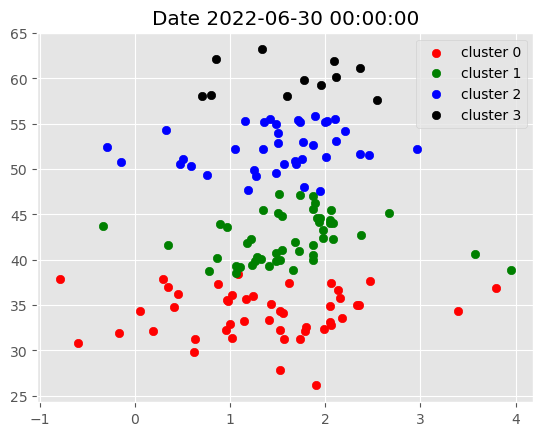

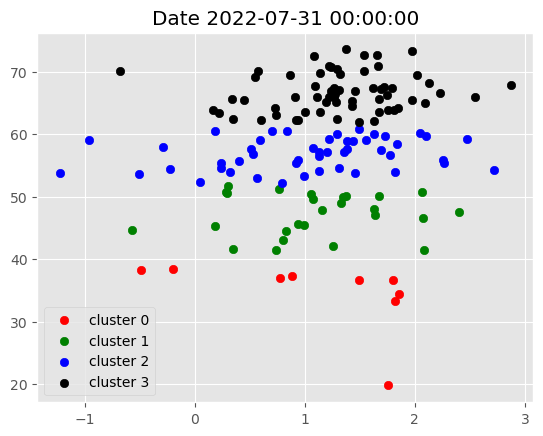

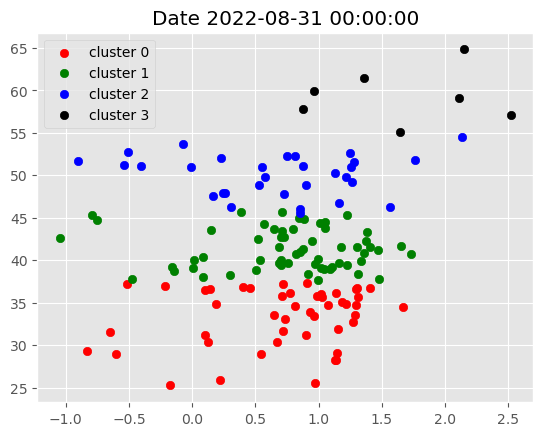

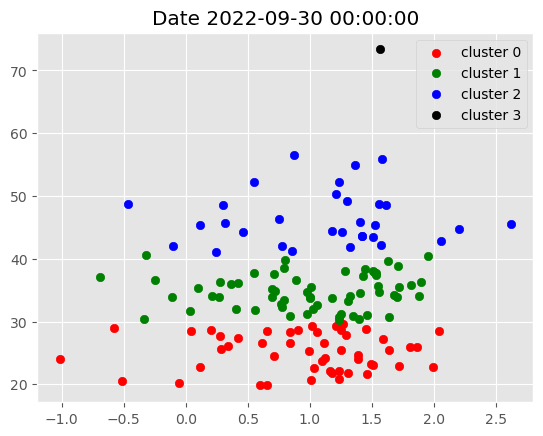

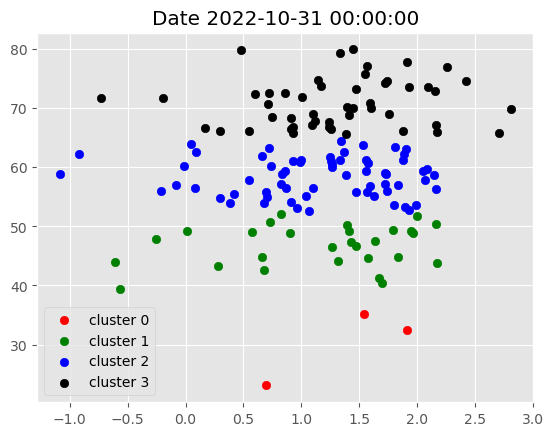

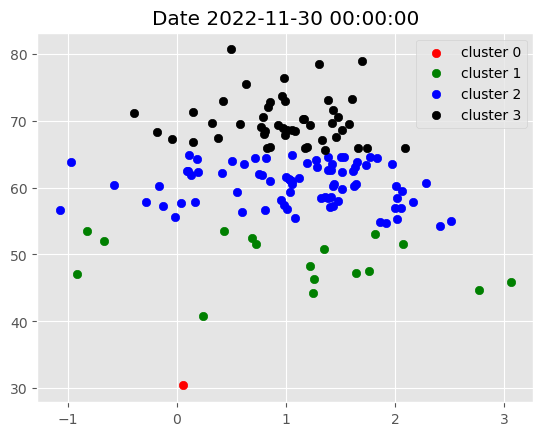

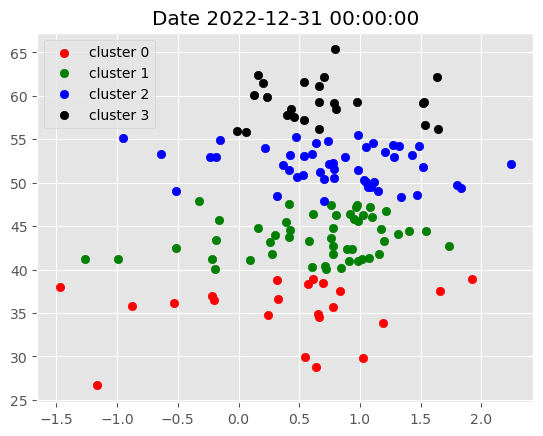

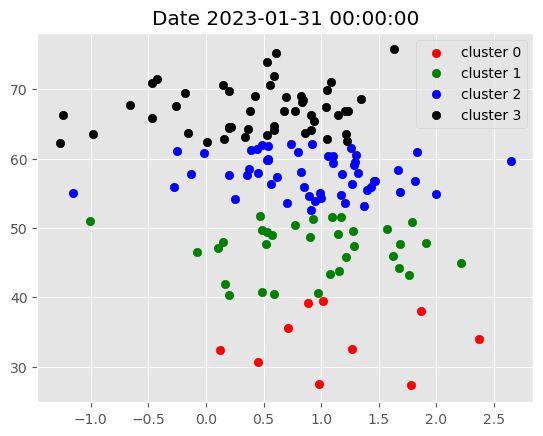

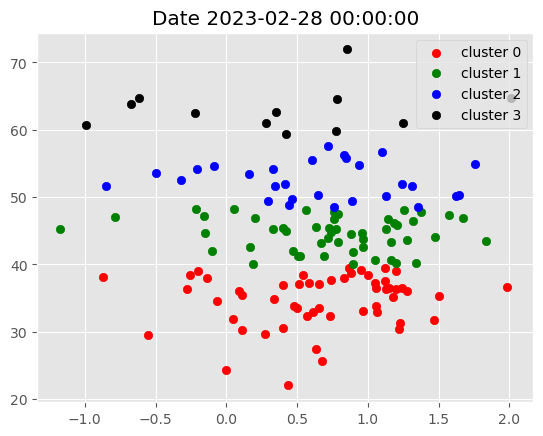

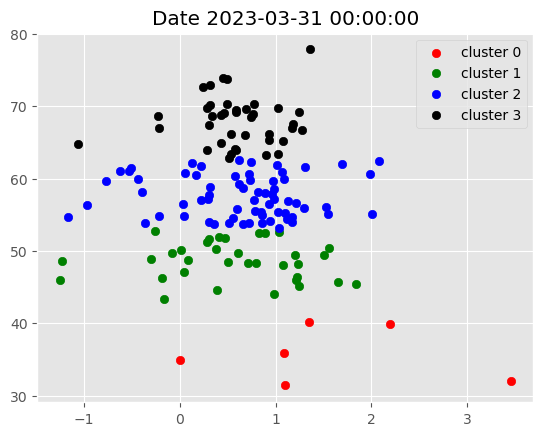

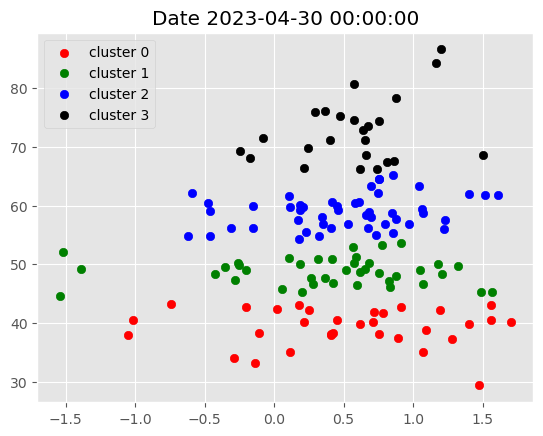

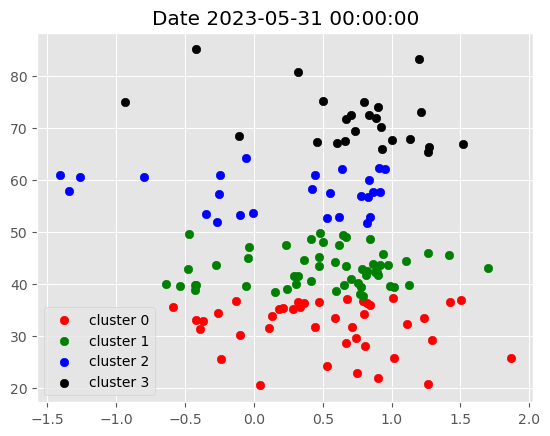

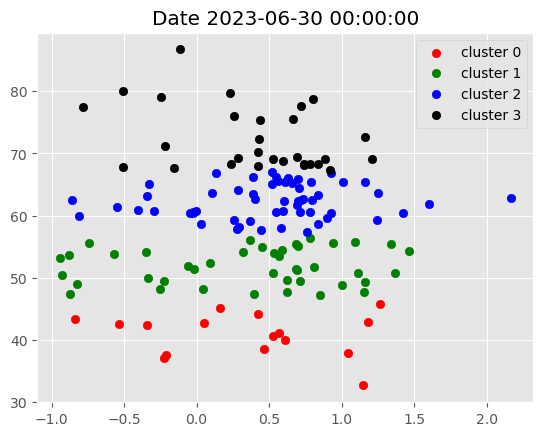

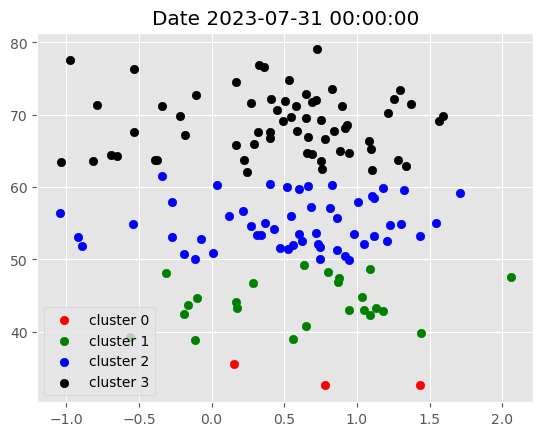

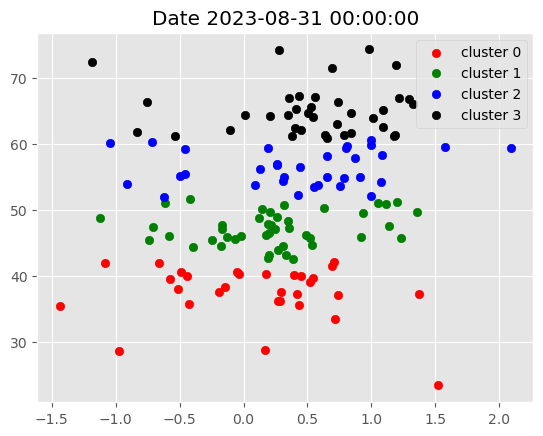

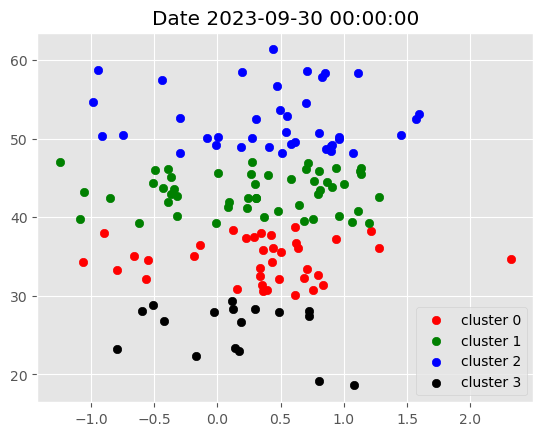

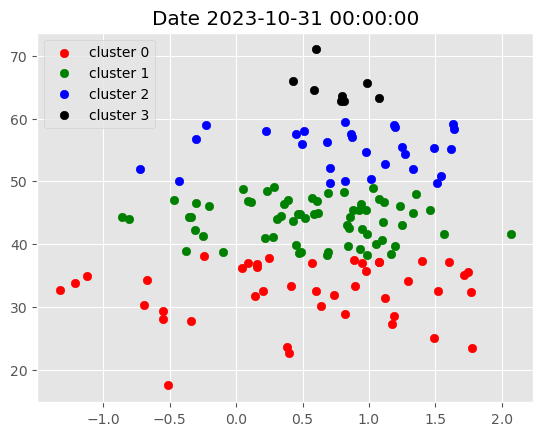

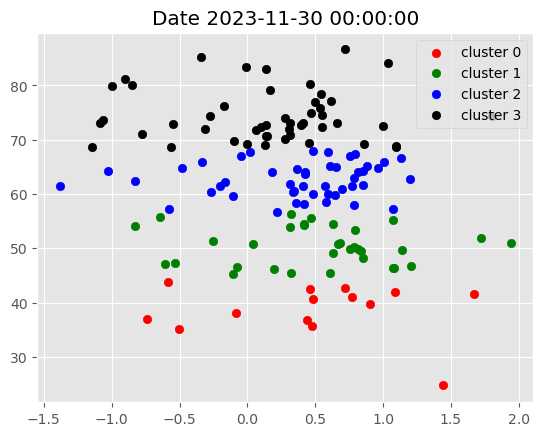

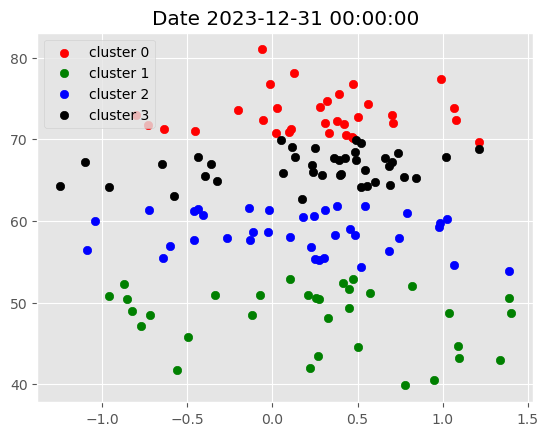

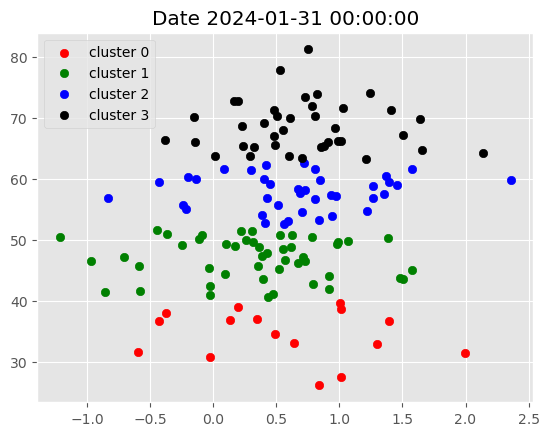

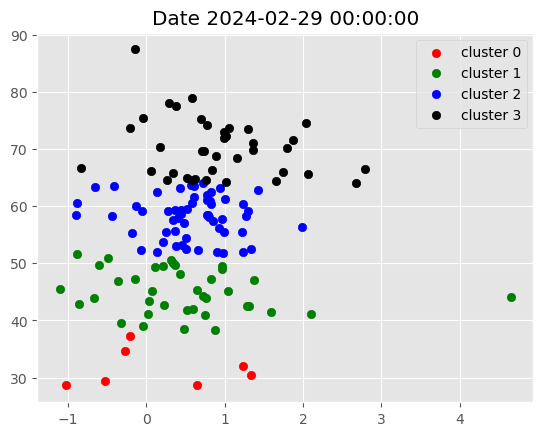

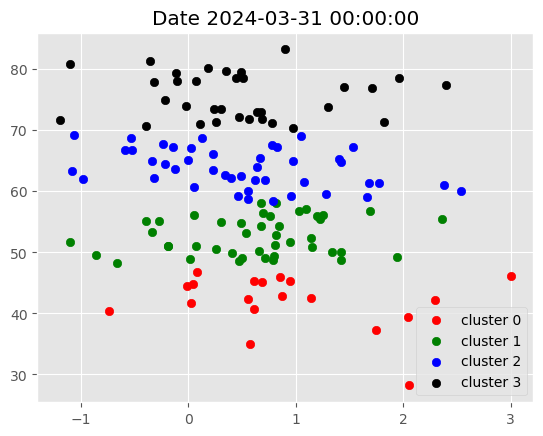

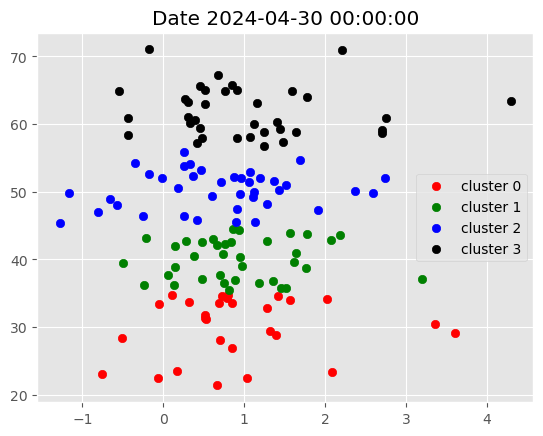

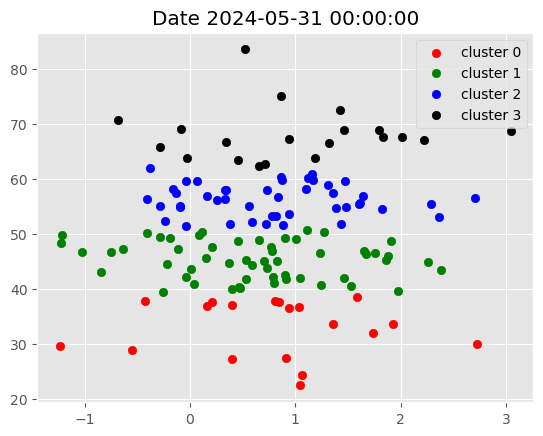

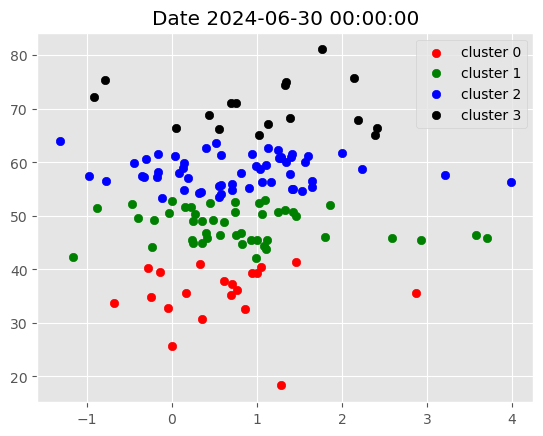

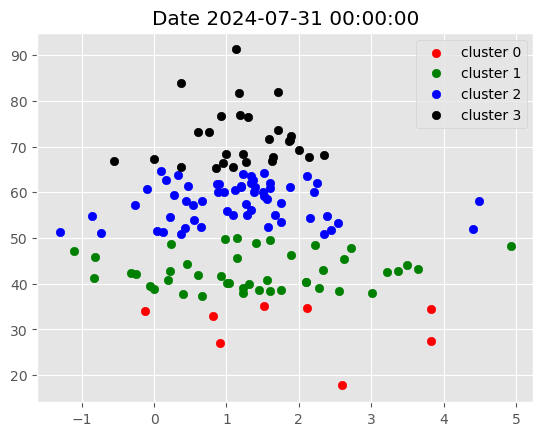

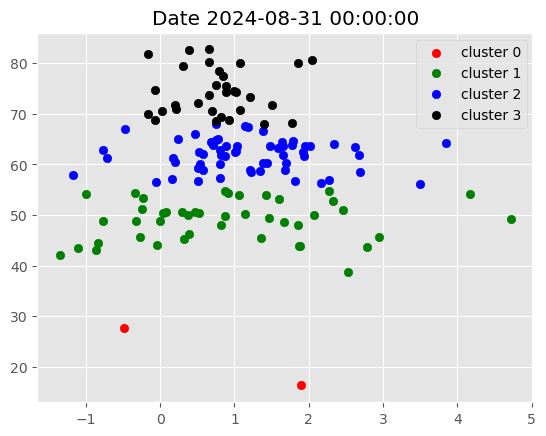

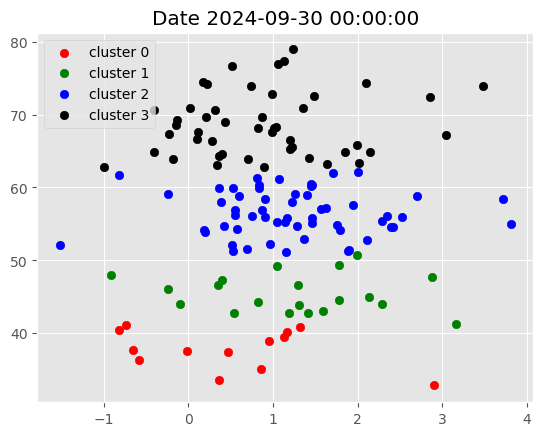

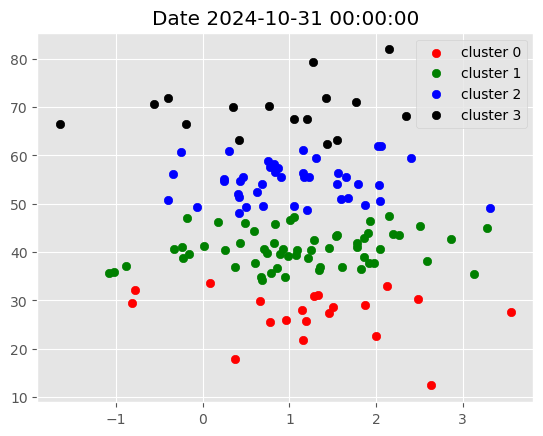

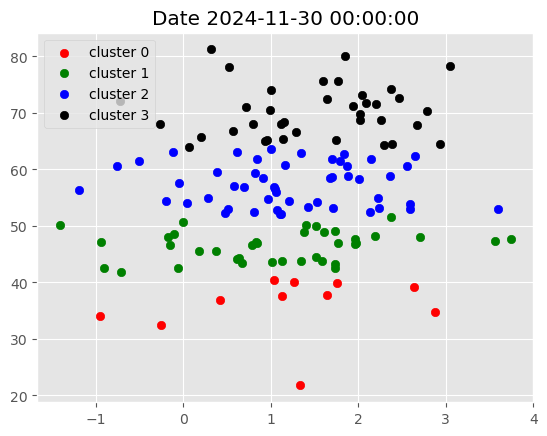

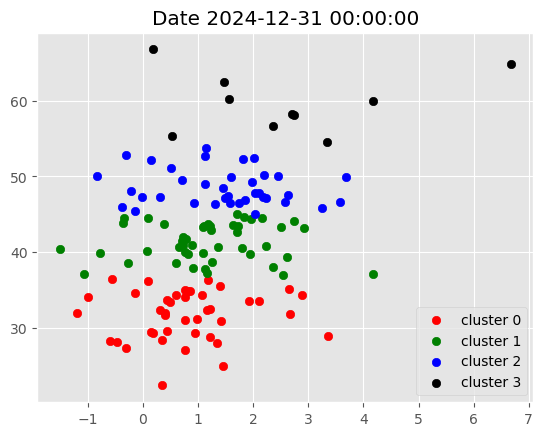

In [50]:
plt.style.use('ggplot')

for i in data.index.get_level_values('Date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [51]:
# 7. For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization
# First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

# Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month -
# thus I would select stocks corresponding to cluster 3.

In [53]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['Date', 'Ticker'])

dates = filtered_df.index.get_level_values('Date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2013-02-01': ['AMAT',
  'BIIB',
  'BMY',
  'BRK-B',
  'DE',
  'DUK',
  'EMR',
  'GS',
  'HAL',
  'HES',
  'LVS',
  'MCD',
  'MDT',
  'MMM',
  'MS',
  'NFLX',
  'OXY',
  'PG',
  'SCHW',
  'TMO',
  'TRV',
  'VLO',
  'WBA'],
 '2013-03-01': ['AMGN',
  'BIIB',
  'BRK-B',
  'CL',
  'CSX',
  'GILD',
  'GOOG',
  'GOOGL',
  'HPQ',
  'JNJ',
  'LLY',
  'MCD',
  'MCK',
  'MMM',
  'MU',
  'NFLX',
  'NSC',
  'PEP',
  'T',
  'VZ'],
 '2013-04-01': ['ADBE',
  'AMGN',
  'AXP',
  'BA',
  'BAX',
  'BIIB',
  'BMY',
  'CL',
  'COST',
  'CSX',
  'CVS',
  'DUK',
  'ELV',
  'EXC',
  'GILD',
  'GLW',
  'HON',
  'HPQ',
  'JNJ',
  'KO',
  'LLY',
  'LVS',
  'MA',
  'MCD',
  'MDLZ',
  'MU',
  'NKE',
  'NSC',
  'PEP',
  'PFE',
  'PM',
  'TGT',
  'TJX',
  'TRV',
  'UAL',
  'UNH',
  'V',
  'VZ',
  'WBA',
  'WMT',
  'WYNN',
  'YUM'],
 '2013-05-01': ['ACN',
  'AMAT',
  'AMT',
  'DIS',
  'DUK',
  'EXC',
  'FSLR',
  'GLW',
  'GM',
  'INTC',
  'LULU',
  'MGM',
  'MSFT',
  'NFLX',
  'NKE',
  'NVDA',
  'OXY',
  'TPR',
  'V

In [54]:
# Define portfolio optimization function
# We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

# To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

# Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).

In [63]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [64]:
stocks = data.index.get_level_values('Ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('Date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('Date').unique()[-1])

new_df


[*********************100%%**********************]  191 of 191 completed


Adj Close                                                  \
                  AAPL        ABBV         ABT         ACN        ADBE   
Date                                                                     
2012-01-31   13.752223         NaN   20.183451   45.250183   30.950001   
2012-02-01   13.743492         NaN   20.224442   46.102459   31.240000   
2012-02-02   13.711259         NaN   20.295267   45.589512   31.290001   
2012-02-03   13.848638         NaN   20.500265   46.015663   31.850000   
2012-02-06   13.977874         NaN   20.645628   45.502708   31.860001   
...                ...         ...         ...         ...         ...   
2024-12-23  255.270004  178.389999  114.309998  358.769989  446.739990   
2024-12-24  258.200012  180.000000  114.760002  361.630005  447.940002   
2024-12-26  259.019989  179.199997  115.269997  360.429993  450.160004   
2024-12-27  255.589996  178.009995  114.989998  356.179993  446.480011   
2024-12-30  252.199997  176.199997  112.800003  352.489990  445.799988   

                                                                       ...  \
                   ADI         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2012-01-31   29.064676   35.777309   36.000000  19.434364   10.047147  ...   
2012-02-01   29.228104   35.888344   37.000000  20.587580   10.284414  ...   
2012-02-02   29.220680   35.803436   36.820000  20.363123   10.341685  ...   
2012-02-03   29.770327   36.254066   37.849998  21.028740   10.464415  ...   
2012-02-06   29.391500   36.005882   37.759998  20.742373   10.317142  ...   
...                ...         ...         ...        ...         ...  ...   
2024-12-23  214.889999  294.149994  297.489990  72.470001  167.460007  ...   
2024-12-24  218.089996  296.459991  301.230011  72.839996  168.369995  ...   
2024-12-26  218.059998  297.230011  300.279999  73.339996  167.550003  ...   
2024-12-27  216.990005  296.179993  297.589996  73.000000  166.830002  ...   
2024-12-30  212.559998  292.970001  297.529999  72.550003  163.639999  ...   

              Volume                                                    \
                VTRS        VZ       WBA       WDAY      WDC       WFC   
Date                                                                     
2012-01-31   4415700  14501100  13599200        NaN  3492500  31203600   
2012-02-01  12070500  13334100  12924500        NaN  7320600  34825000   
2012-02-02   4556300  12390700  10113400        NaN  3396400  24624600   
2012-02-03   5039700  11413800  13180600        NaN  2329500  46264900   
2012-02-06   5258500  14942200  19906700        NaN  2389700  23337800   
...              ...       ...       ...        ...      ...       ...   
2024-12-23   8585200  21292300  18506100  3676000.0  4111200  11817000   
2024-12-24   4059600  11712200   8724500   850500.0  1512100   4442700   
2024-12-26   6194700  12946400  15705800  1243900.0  2146000   6964300   
2024-12-27   5182600  15168100  11621000  1602800.0  4161800   7219500   
2024-12-30   5822900  15672000  13992700  1755600.0  4410100   8443800   

                                                  
                 WMT     WYNN       XOM      YUM  
Date                                              
2012-01-31  29284500  1639200  27225800  4825657  
2012-02-01  36391800  3266400  22266100  4078273  
2012-02-02  18633900  4245900  18020500  4827466  
2012-02-03  23181600  7266100  16145400  5478593  
2012-02-06  16441800  3306100  15000900  7820619  
...              ...      ...       ...      ...  
2024-12-23  26205400  1312400  12285100  1479100  
2024-12-24   8992400   692800   7807000   533000  
2024-12-26  10994000  1218900   9652400  1040900  
2024-12-27  11384400  1086700  11943900  1146300  
2024-12-30   9790200  2180100  11080800  1144600  

[3250 rows x 1146 columns]

In [58]:
# Calculate daily returns for each stock which could land up in our portfolio.

# Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

# If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

# Calculated each day portfolio return.

In [65]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2013-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2014-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2015-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2015-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-11-01, Continuing with Equal-Weights

Strategy Return
date                       
2013-02-01         0.012788
2013-02-04        -0.010575
2013-02-05         0.011699
2013-02-06         0.004418
2013-02-07        -0.002607
...                     ...
2024-12-23        -0.000618
2024-12-24         0.013932
2024-12-26         0.000452
2024-12-27        -0.011745
2024-12-30        -0.011292

[2998 rows x 1 columns]

In [60]:
# 8. Visualize Portfolio returns and compare to SP500 returns.

In [66]:
spy = yf.download(tickers='SPY',
                  start='2013-02-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


Strategy Return  SPY Buy&Hold
2013-02-04        -0.010575     -0.011304
2013-02-05         0.011699      0.010047
2013-02-06         0.004418      0.000728
2013-02-07        -0.002607     -0.001324
2013-02-08         0.006344      0.005549
...                     ...           ...
2024-12-23        -0.000618      0.005970
2024-12-24         0.013932      0.011054
2024-12-26         0.000452      0.000067
2024-12-27        -0.011745     -0.010582
2024-12-30        -0.011292     -0.011477

[2997 rows x 2 columns]

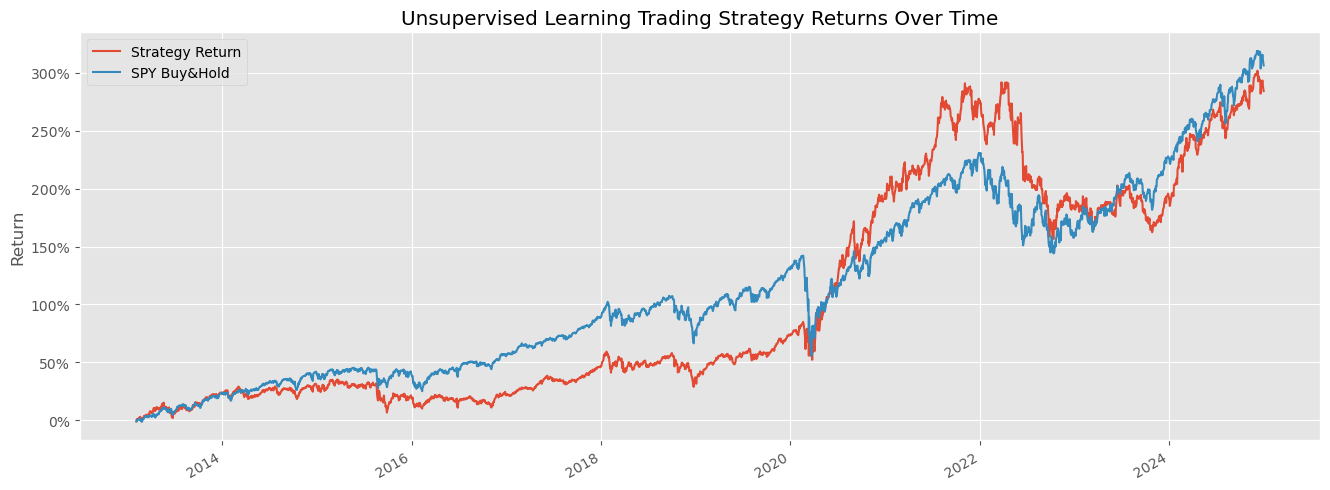

In [67]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2024-12-30'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()